# EDA
В этом ноутбуке мы проведем разведочный анализ данных, чтобы:
- ознакомится с набором данных
- посмотреть на имеющиеся взаимосвязи
- вытянуть интересные инсайты из данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_excel('drive/MyDrive/LEVEL/raw_data.xlsx')
df.head()

,#_week,date_week,SALES,D15,D20,D25,D30,PRICE,MKT,COMPETITIVE SPEND,...,CLASSIFIEDS CIAN,CLASSIFIEDS IRN,CLASSIFIEDS NOVOSTROY GID,CLASSIFIEDS NOVOSTROY-M,CLASSIFIEDS OTHER,CLASSIFIEDS CIAN_IMP,CLASSIFIEDS IRN_IMP,CLASSIFIEDS NOVOSTROY GID_IMP,CLASSIFIEDS NOVOSTROY-M_IMP,CLASSIFIEDS OTHER_IMP
0,1,2022-01-01,0.000000e+00,0,0,0,0,0.000000,0.000000e+00,1.061911e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,2022-01-08,0.000000e+00,0,0,0,0,0.000000,1.259346e+08,1.061911e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,2022-01-15,1.499831e+08,0,0,0,0,351577.741728,2.478954e+09,1.061911e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,2022-01-22,1.720732e+08,0,0,0,0,378182.931218,1.162480e+09,1.061911e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,2022-01-29,3.001308e+08,0,0,0,0,348139.218366,1.424906e+09,1.061911e+08,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Анализ переменной SALES
Начнем с того, что проанализируем переменную продаж - поймем как выглядит ее график и распределение. Масштабируем ее при необходимости

In [369]:
df['SALES'].describe()

,SALES
count,1.180000e+02
mean,1.889433e+08
std,1.430571e+08
min,0.000000e+00
25%,9.284296e+07
50%,1.699618e+08
75%,2.583663e+08
max,7.951222e+08


Кажется что масштаб не самый приятный для анализа, выразим переменную в миллионах

In [370]:
df['SALES_mln'] = df['SALES'] / 1e6
df['SALES_mln'].describe()

,SALES_mln
count,118.000000
mean,188.943323
std,143.057055
min,0.000000
25%,92.842961
50%,169.961843
75%,258.366283
max,795.122156


Видим, что у нас достаточно серьезный разброс данных. При этом среднее сильно смещенно в сторону меньших значений, что говорит о том, что значений близких к максимуму у нас не так много

In [371]:
df['SALES_mln_rolling'] = df['SALES_mln'].rolling(window=5).mean()

In [372]:
x = df[df['date_week'] == '2022-05-14']['date_week'].to_numpy()
y = df[df['date_week'] == '2022-05-14']['SALES_mln'].to_numpy()

In [373]:
x, y

(array(['2022-05-14T00:00:00.000000000'], dtype='datetime64[ns]'), array([0.]))

In [374]:
x_bunt = df[df['date_week'] == '2022-10-8']['date_week'].to_numpy()
y_bunt = df[df['date_week'] == '2022-10-8']['SALES_mln'].to_numpy()

Text(2022-10-08T00:00:00.000000001, 700.0, 'And here')

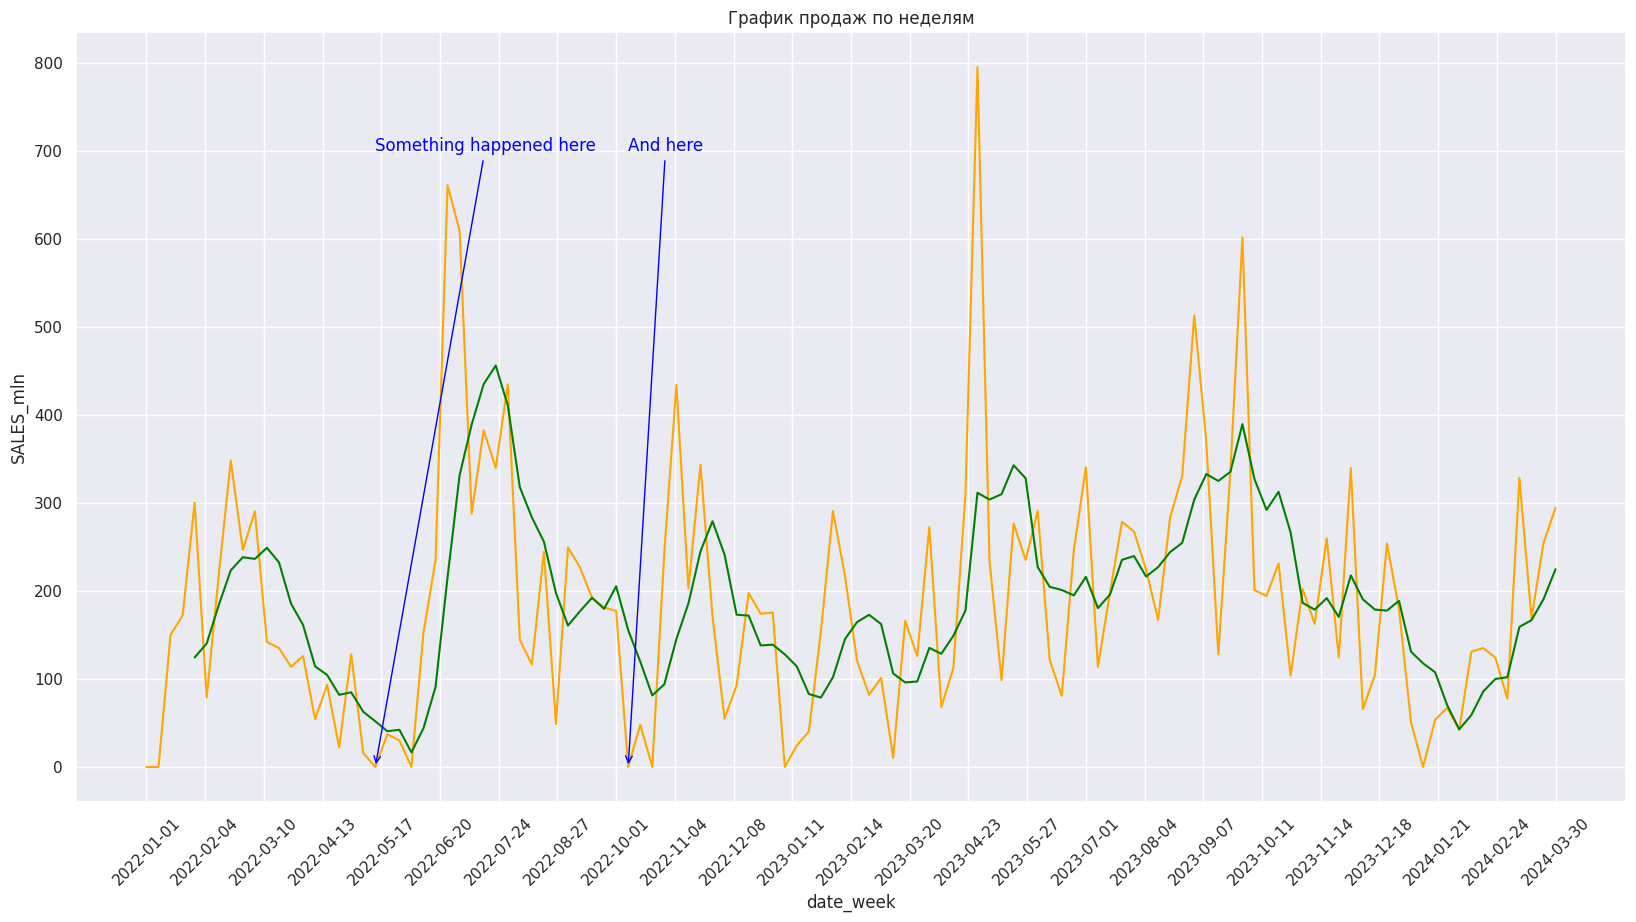

In [375]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (20,10))
sns.lineplot(df, x = 'date_week', y = 'SALES_mln', ax = ax, color ='#ffa600')
sns.lineplot(df, x = 'date_week', y = 'SALES_mln_rolling', ax = ax, color ='green')

xmin, xmax = ax.get_xlim()

dates = np.linspace(df["date_week"].min().value, df["date_week"].max().value, 25)
dates = pd.to_datetime(dates)

ax.set_xticks(dates)
_ = ax.set_xticklabels([d.strftime("%Y-%m-%d") for d in dates], rotation=45)

ax.set_title("График продаж по неделям")

# in 2023 patterns changed - what happened? (появились новые каналы)


ax.annotate('Something happened here',
             xy=(x[0], y[0]),
             xytext=(x[0]+1, y[0]+700),
             arrowprops=dict(arrowstyle='->', color='blue'),
             fontsize=12,
             color='blue')


ax.annotate('And here',
             xy=(x_bunt[0], y_bunt[0]),
             xytext=(x_bunt[0]+1, y_bunt[0]+700),
             arrowprops=dict(arrowstyle='->', color='blue'),
             fontsize=12,
             color='blue')



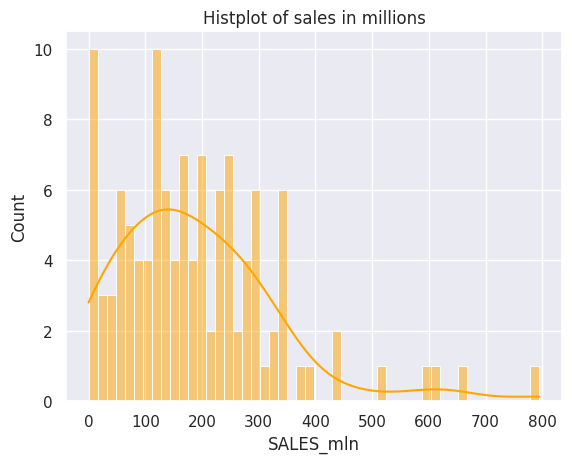

In [376]:
sns.set_theme()

ax = sns.histplot(df['SALES_mln'], bins=50, kde=True, color = '#ffa600')
_ = ax.set_title('Histplot of sales in millions')

Мы видим, что распределение продаж далеко от нормального. Основная масса наблюдений собрана в левой части распределения. Также мы можем наблюдать длинный хвост распределение положительном направлении оси X.

Учитывая то, что далее нам предстоит строить регрессию по данному признаку, мы можем логарифмировать его, чтобы выровнять распределение.

Text(0.5, 1.0, 'Boxplot of sales in millions')

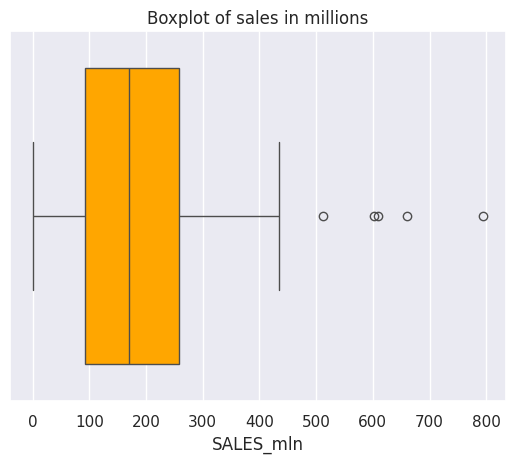

In [377]:
ax = sns.boxplot(x=df['SALES_mln'], color='#ffa600', saturation=1)
ax.set_title('Boxplot of sales in millions')

Также на boxplot мы можем наблюдать большие значения выбросов (мы видели их и на предыдущем графике). В дальнейшем нужно будет подумать как их обрабатывать.

Логарифмируем нашу целевую переменную и сохраним ее в новой колонке


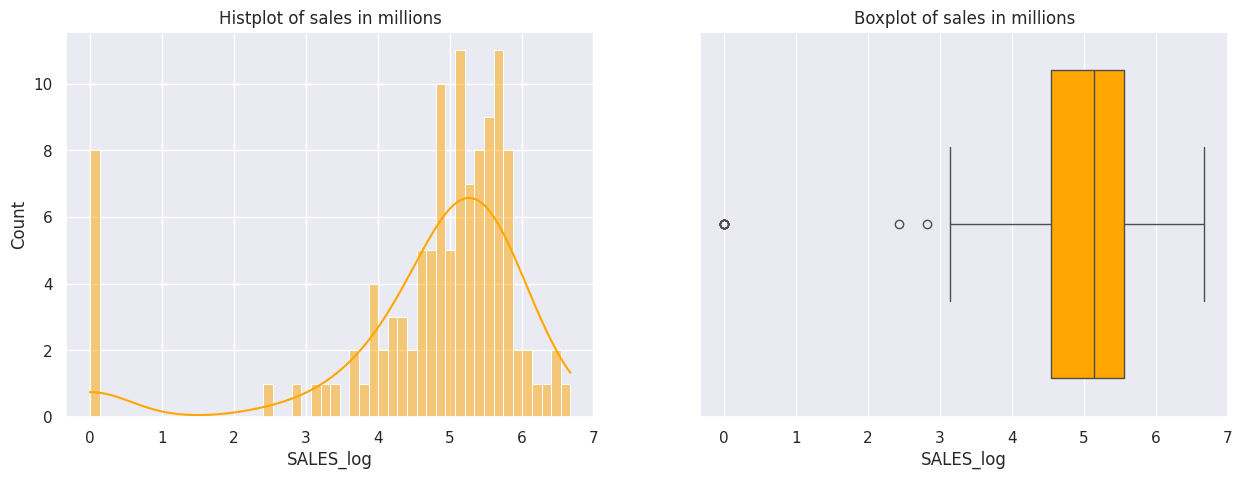

In [378]:
df['SALES_log'] = np.log(1+df['SALES_mln'])
fig, axes = plt.subplots(1,2, figsize = (15,5))

sns.histplot(df['SALES_log'], bins=50, kde=True, color = '#ffa600', ax = axes[0])
axes[0].set_title('Histplot of sales in millions')

sns.boxplot(x=df['SALES_log'], color='#ffa600', saturation=1, ax = axes[1])
_ = axes[1].set_title('Boxplot of sales in millions')

Text(0.5, 1.0, 'График продаж (логарифмированные значения в млн) по неделям')

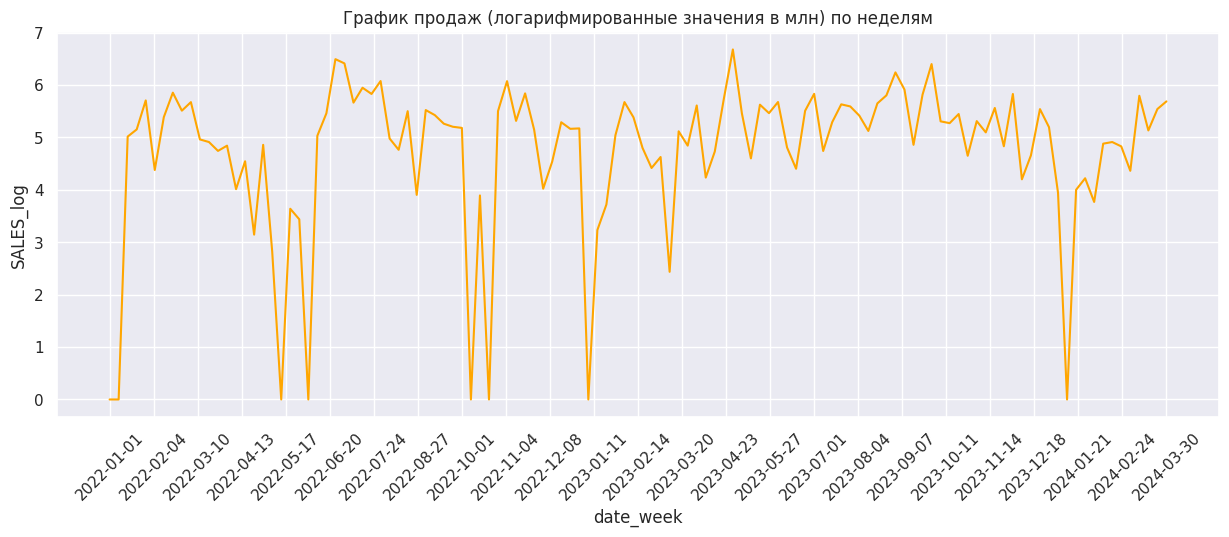

In [379]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (15,5))
sns.lineplot(df, x = 'date_week', y = 'SALES_log', ax = ax, color ='#ffa600')
xmin, xmax = ax.get_xlim()

dates = np.linspace(df["date_week"].min().value, df["date_week"].max().value, 25)
dates = pd.to_datetime(dates)

ax.set_xticks(dates)
_ = ax.set_xticklabels([d.strftime("%Y-%m-%d") for d in dates], rotation=45)

ax.set_title("График продаж (логарифмированные значения в млн) по неделям")

# in 2023 patterns changed - what happened?

Вполть до начала 2023 года мы отчетливо можем видеть некоторый паттерн поведения продаж. Причем чем ближе к концу 2022 года - тем его длина становится меньше. После же 2023 года этот паттерн пропадает и продажи становятся более равномерными, без просадок в нули. Это интересное наблюдение, которое стоит исследовать дальше

Также видно, что каждый год в начале года продажи всегда падают в ноль - что логично объясняется новогодними праздниками.

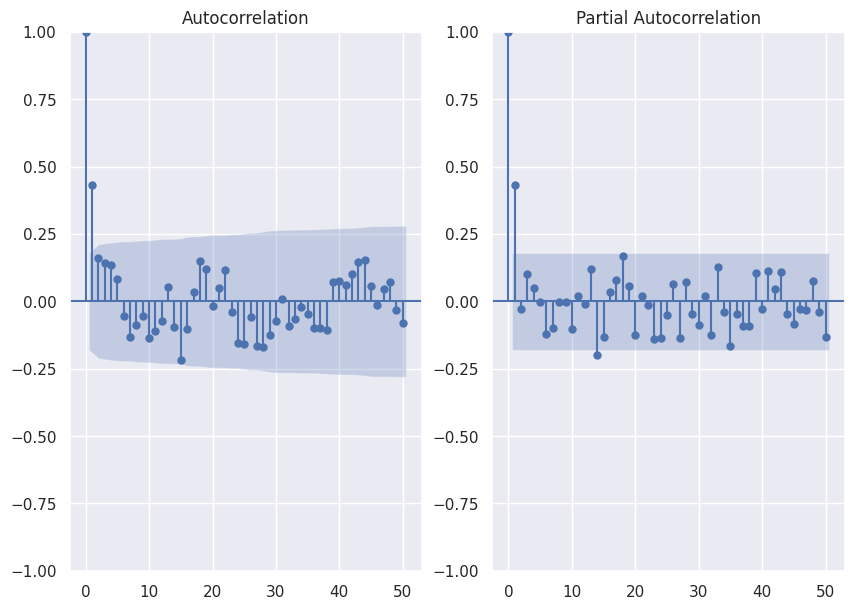

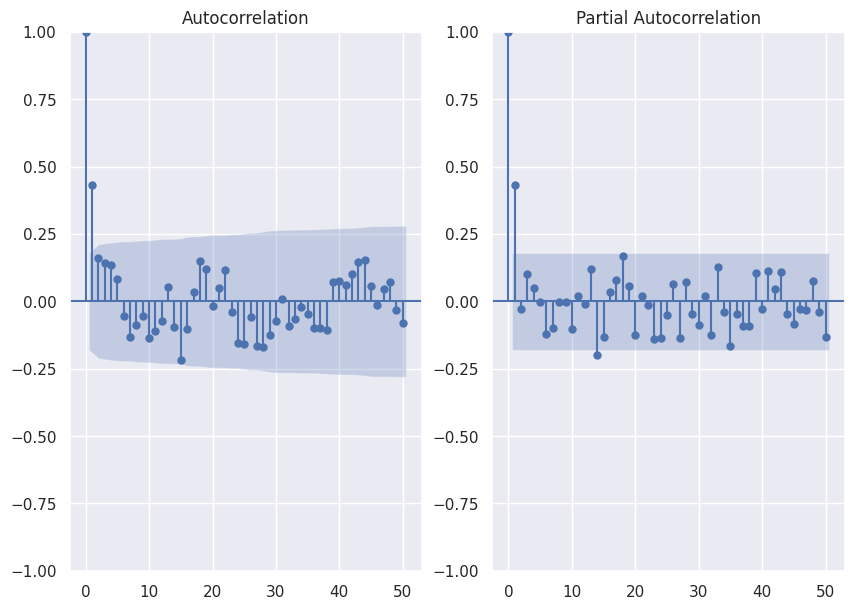

In [380]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2, figsize = (10, 7))
plot_acf(df['SALES_mln'], lags=50, ax = axes[0])
plot_pacf(df['SALES_mln'], lags=50, ax = axes[1])

Оценим графики автокорелляции и частичной автокорреляции при различных сдвигах. По графикам видно, что никакой сезонности в данных не замечается

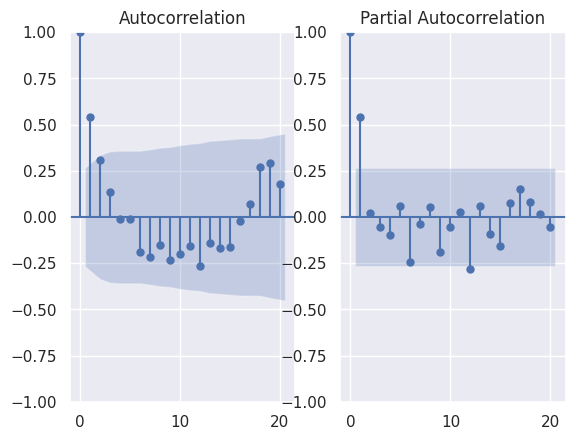

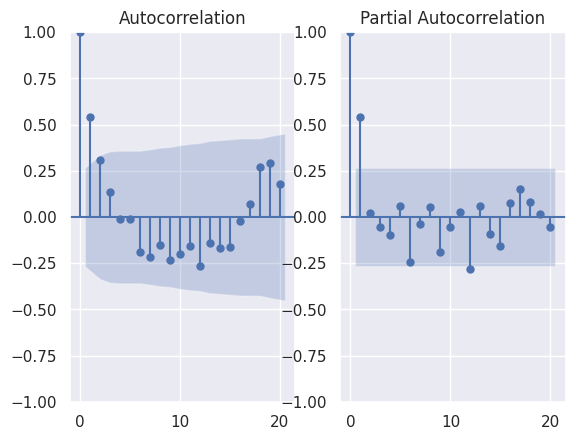

In [381]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2)
plot_acf(df[df['date_week'] <= '2023-01-11']['SALES_mln'], lags=20, ax = axes[0])
plot_pacf(df[df['date_week'] <= '2023-01-11']['SALES_mln'], lags=20, ax = axes[1])

Тоже самое можно сказать про период, который мы ранее отмечали. Скорее всего, паттерны, которые мы видели на графике продаж имеют более сложную природу и нам предстоит проанализировать все остальные признаки, что понять откуда они взялись.

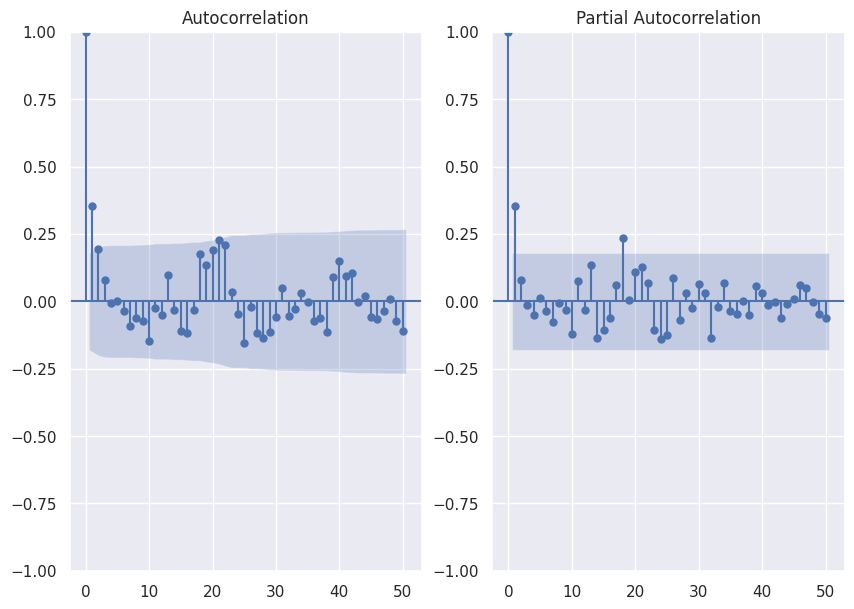

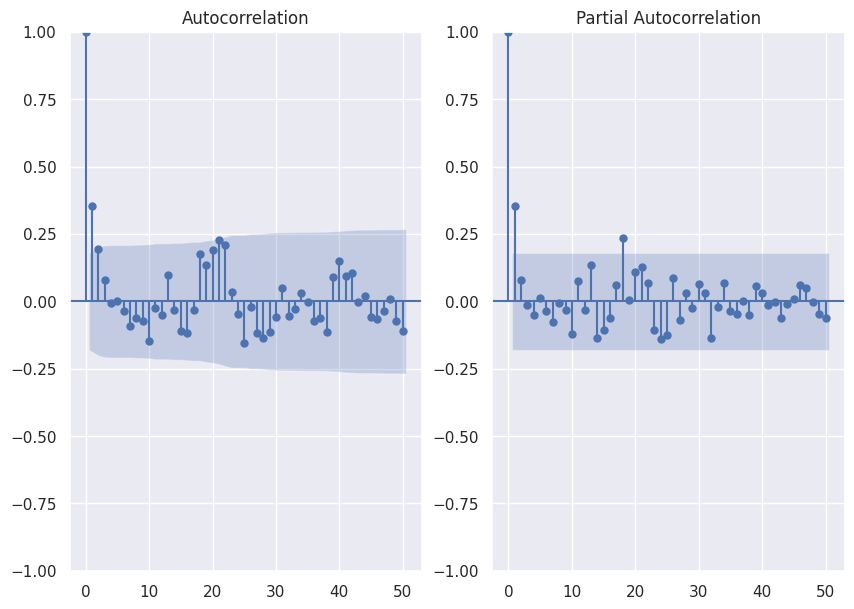

In [382]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2, figsize = (10, 7))
plot_acf(df['SALES_log'], lags=50, ax = axes[0])
plot_pacf(df['SALES_log'], lags=50, ax = axes[1])

В случае, если пытаться строить графики автокорреляции по логарифмированной переменной, ничего существенно не поменяется.

## Корреляционный анализ всех признаков/SHAP
Проверим как остальные признаки из датасета влияют на нашу целевую переменную продаж. Для удобства разобьем наши переменные на группы - внутренние медийные, внутренние не медейные, внешние (связанные с конкурентами)

In [ ]:
df.columns

Index(['#_week', 'date_week', 'SALES', 'D15', 'D20', 'D25', 'D30', 'PRICE',
       'MKT', 'COMPETITIVE SPEND', 'AGENTS', 'OTHER MEDIA', 'PROGRAMMATIC',
       'PROGRAMMATIC_IMP', 'OOH', 'OOH_IMP', 'CONTEXT BRANDED GOOGLE',
       'CONTEXT BRANDED YANDEX', 'CONTEXT UNBRANDED GOOGLE',
       'CONTEXT UNBRANDED YANDEX', 'CONTEXT BRANDED GOOGLE_IMP',
       'CONTEXT BRANDED YANDEX_IMP', 'CONTEXT UNBRANDED GOOGLE_IMP',
       'CONTEXT UNBRANDED YANDEX_IMP', 'BASES AVITO', 'BASES CIAN',
       'BASES YANDEX', 'BASES OTH', 'BASES M2', 'BASES DOMCLICK',
       'BASES AVITO_IMP', 'BASES CIAN_IMP', 'BASES YANDEX_IMP',
       'BASES OTH_IMP', 'BASES M2_IMP', 'BASES DOMCLICK_IMP',
       'CLASSIFIEDS CIAN', 'CLASSIFIEDS IRN', 'CLASSIFIEDS NOVOSTROY GID',
       'CLASSIFIEDS NOVOSTROY-M', 'CLASSIFIEDS OTHER', 'CLASSIFIEDS CIAN_IMP',
       'CLASSIFIEDS IRN_IMP', 'CLASSIFIEDS NOVOSTROY GID_IMP',
       'CLASSIFIEDS NOVOSTROY-M_IMP', 'CLASSIFIEDS OTHER_IMP', 'SALES_mln',
       'SALES_log'],
      dt

In [383]:
inner = ['D15', 'D20', 'D25', 'D30', 'PRICE', 'AGENTS']

inner_media = ['OTHER MEDIA', 'PROGRAMMATIC',
       'PROGRAMMATIC_IMP', 'OOH', 'OOH_IMP', 'CONTEXT BRANDED GOOGLE',
       'CONTEXT BRANDED YANDEX', 'CONTEXT UNBRANDED GOOGLE',
       'CONTEXT UNBRANDED YANDEX', 'CONTEXT BRANDED GOOGLE_IMP',
       'CONTEXT BRANDED YANDEX_IMP', 'CONTEXT UNBRANDED GOOGLE_IMP',
       'CONTEXT UNBRANDED YANDEX_IMP', 'BASES AVITO', 'BASES CIAN',
       'BASES YANDEX', 'BASES OTH', 'BASES M2', 'BASES DOMCLICK',
       'BASES AVITO_IMP', 'BASES CIAN_IMP', 'BASES YANDEX_IMP',
       'BASES OTH_IMP', 'BASES M2_IMP', 'BASES DOMCLICK_IMP',
       'CLASSIFIEDS CIAN', 'CLASSIFIEDS IRN', 'CLASSIFIEDS NOVOSTROY GID',
       'CLASSIFIEDS NOVOSTROY-M', 'CLASSIFIEDS OTHER', 'CLASSIFIEDS CIAN_IMP',
       'CLASSIFIEDS IRN_IMP', 'CLASSIFIEDS NOVOSTROY GID_IMP',
       'CLASSIFIEDS NOVOSTROY-M_IMP', 'CLASSIFIEDS OTHER_IMP']

concurents = [ 'MKT', 'COMPETITIVE SPEND']

In [393]:
tmp = df[[*inner, 'SALES_mln', 'SALES_log']].corr()[['SALES_mln','SALES_log']].drop(['SALES_mln', 'SALES_log']).sort_values(by='SALES_log', ascending = False)
tmp

,SALES_mln,SALES_log
PRICE,0.279104,0.764365
AGENTS,0.727396,0.466938
D25,0.111842,0.125492
D20,0.149608,0.086355
D30,-0.101640,-0.059377
D15,-0.192107,-0.213362


<Axes: xlabel='None', ylabel='SALES_log'>

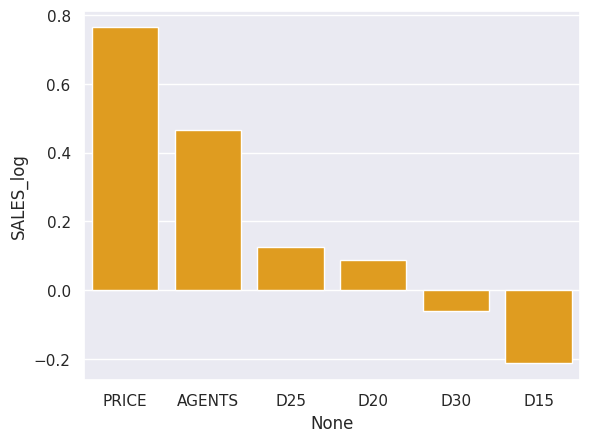

In [394]:
sns.barplot(x=tmp.index, y=tmp['SALES_log'], color ='#ffa600')

In [389]:
tmp = df[[*concurents, 'SALES_mln', 'SALES_log']].corr()[['SALES_mln','SALES_log']].drop(['SALES_mln', 'SALES_log']).sort_values(by='SALES_log', ascending = False)
tmp

,SALES_mln,SALES_log
MKT,0.265065,0.382255
COMPETITIVE SPEND,0.046702,0.175722


<Axes: xlabel='None', ylabel='SALES_log'>

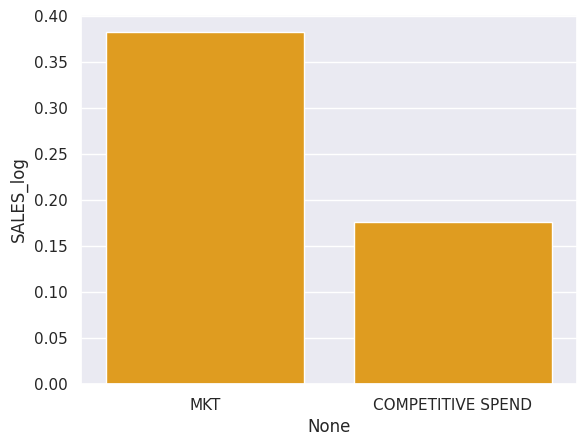

In [390]:
sns.barplot(x=tmp.index, y=tmp['SALES_log'], color ='#ffa600')

In [400]:
tmp = df[[*inner_media, 'SALES_mln', 'SALES_log']].corr()[['SALES_mln','SALES_log']].drop(['SALES_mln', 'SALES_log']).sort_values(by='SALES_log', ascending = False)
tmp = tmp.reset_index()
imp_features = tmp[tmp['index'].apply(lambda x: 'IMP' in x)]
budgets = tmp[tmp['index'].apply(lambda x: 'IMP' not in x)]

/tmp/ipython-input-410-700667951.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")


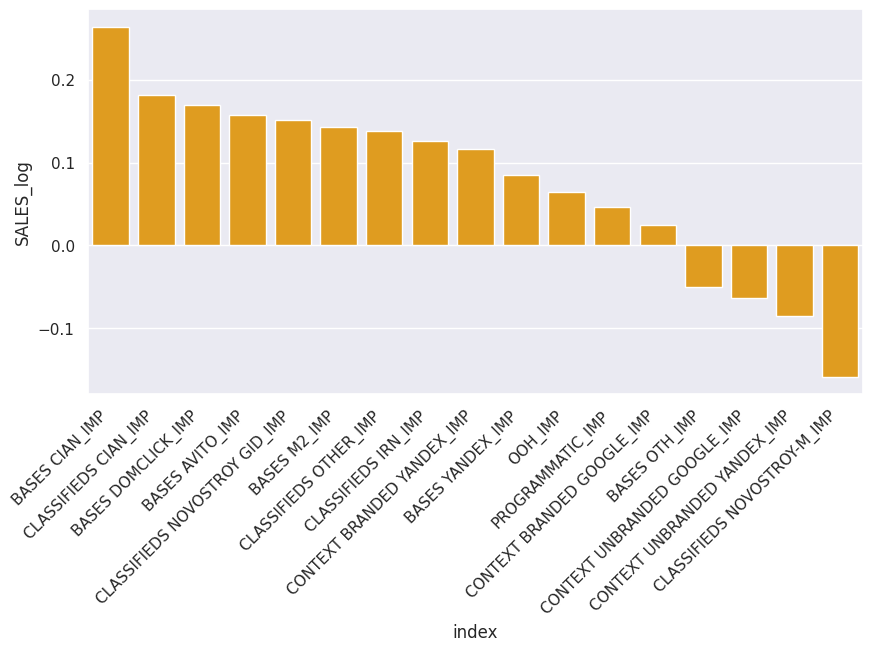

In [410]:
fig, ax = plt.subplots(figsize = (10,5))


sns.barplot(x=imp_features['index'], y=imp_features['SALES_log'], ax=ax, color ='#ffa600')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

/tmp/ipython-input-411-752332178.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')


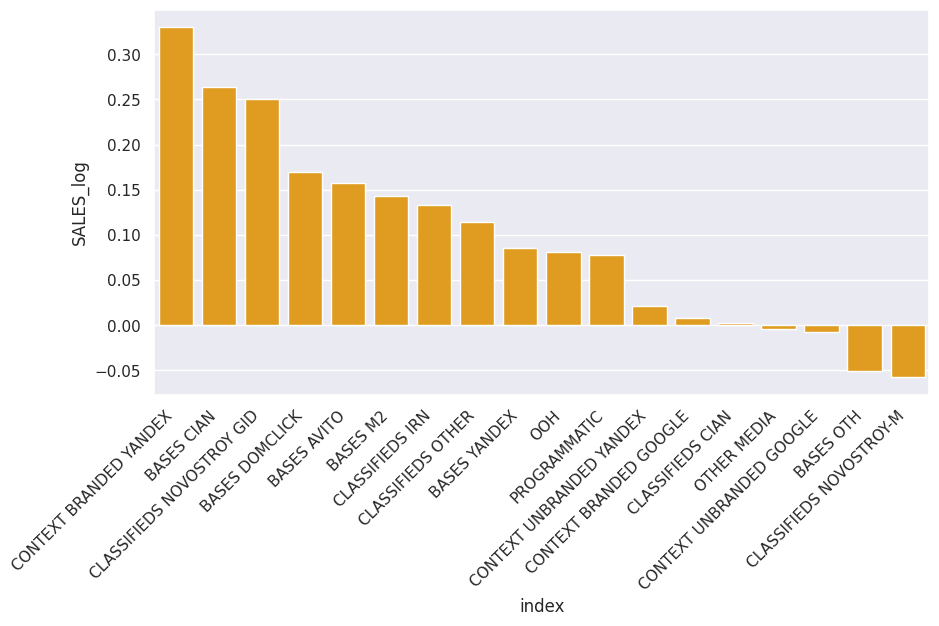

In [411]:
fig, ax = plt.subplots(figsize = (10,5))

sns.barplot(x=budgets['index'], y=budgets['SALES_log'], color ='#ffa600')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.1 MB/s eta 0:00:00


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 4.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import shap
import optuna
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import numpy as np


X = df.drop(columns=['SALES_mln', 'SALES_log', 'SALES'])
y = df['SALES_log']


def objective(trial):
    params = {
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "depth": trial.suggest_int("depth", 3, 8),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1, 10.0),
        "random_strength": trial.suggest_float("random_strength", 0.5, 2.0),
        "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli"]),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0, 1) if trial.suggest_categorical("bootstrap_type", ["Bayesian", "Bernoulli"]) == "Bayesian" else None,
        "iterations": 500,
        "early_stopping_rounds": 20,
        "verbose": 0,
        "random_state": 42
    }

    tscv = TimeSeriesSplit(n_splits=5)
    rmses = []

    for train_idx, val_idx in tscv.split(X):
        X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

        model = CatBoostRegressor(**params)
        model.fit(X_train, y_train, eval_set=(X_val, y_val))

        y_pred = model.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmses.append(rmse)

    return np.mean(rmses)


study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=30, show_progress_bar=True)

print("Лучшие параметры:", study.best_params)
print("Лучшее значение RMSE:", study.best_value)


best_params = study.best_params
best_params.update({
    "iterations": 500,
    "early_stopping_rounds": 20,
    "verbose": 0,
    "random_state": 42
})


split_index = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

model = CatBoostRegressor(**best_params)
model.fit(X_train, y_train, eval_set=(X_test, y_test))

[I 2025-07-23 16:54:32,803] A new study created in memory with name: no-name-084973f5-4d1d-41ec-bb82-d5638a2063cf


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2025-07-23 16:54:34,644] Trial 0 finished with value: 0.9454422920330785 and parameters: {'learning_rate': 0.13096923690245704, 'depth': 5, 'l2_leaf_reg': 5.414534555074821, 'random_strength': 1.7673582862173811, 'bootstrap_type': 'Bernoulli'}. Best is trial 0 with value: 0.9454422920330785.
[I 2025-07-23 16:54:35,408] Trial 1 finished with value: 0.8509233787483199 and parameters: {'learning_rate': 0.2804716101326823, 'depth': 3, 'l2_leaf_reg': 8.34874725947687, 'random_strength': 1.675066474485929, 'bootstrap_type': 'Bernoulli'}. Best is trial 1 with value: 0.8509233787483199.
[I 2025-07-23 16:54:36,936] Trial 2 finished with value: 0.9085896963469617 and parameters: {'learning_rate': 0.06987792019312809, 'depth': 5, 'l2_leaf_reg': 7.899471212088824, 'random_strength': 0.86303755510474, 'bootstrap_type': 'Bayesian', 'bagging_temperature': 0.34767025416254216}. Best is trial 1 with value: 0.8509233787483199.
[I 2025-07-23 16:54:37,336] Trial 3 finished with value: 0.785990988086649

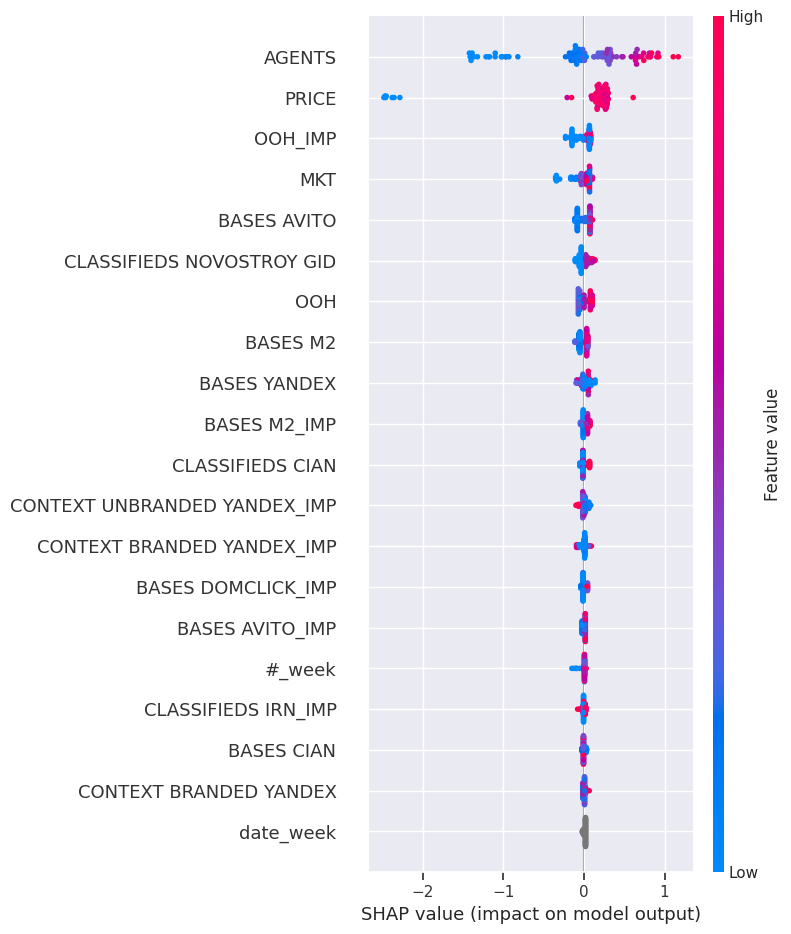

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)

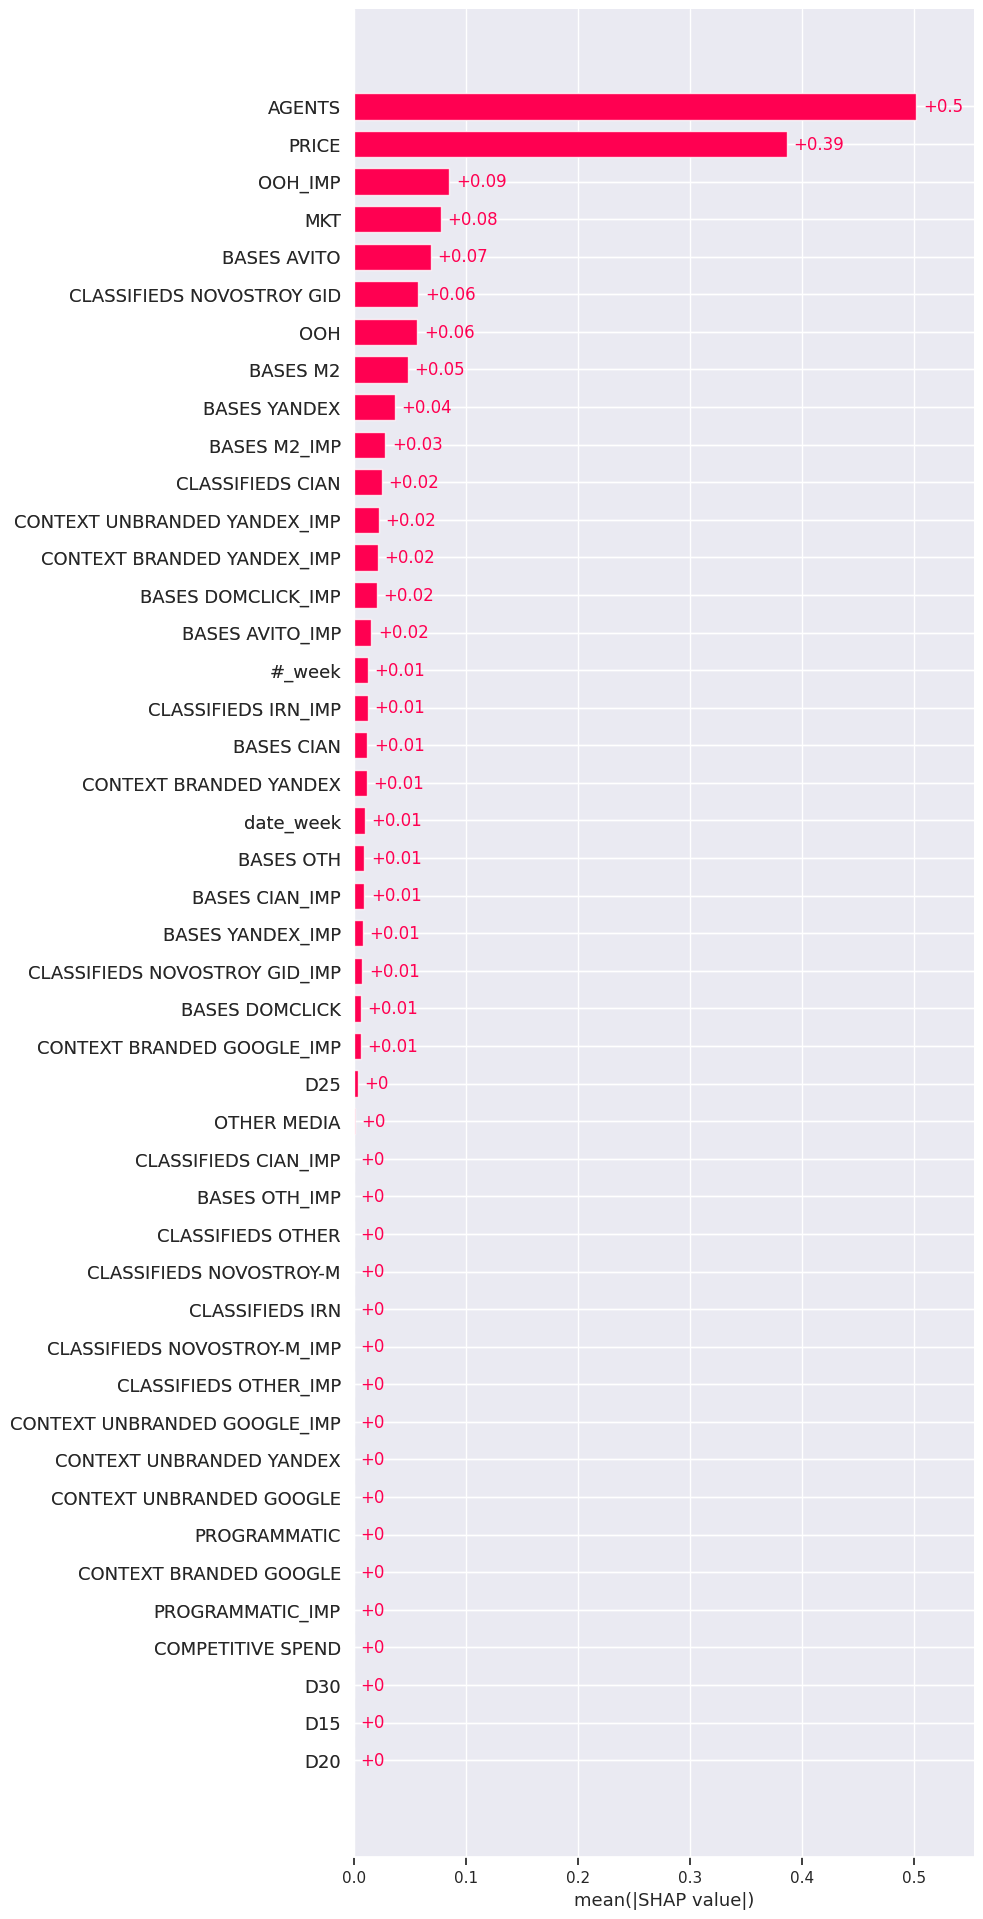

In [ ]:
shap.plots.bar(shap.Explanation(values=shap_values,
                                base_values=explainer.expected_value,
                                data=X_train.values,
                                feature_names=X_train.columns),
               max_display=len(X_train.columns)
                )

Мы видим, что очень большой вклад в формирование цены вносят агентские выплаты и цена. Но кажется, что точно выяснить причинно-следственную связь тут будет проблемой. Скорее всего высокие агентские - следствие высоких продаж. (TODO)

Стоимость квадртаного метра, напротив, является больше интересным признаком. На первый взгляд - не самая очевидная связь. По идее повышение цены не должно вести к повышению продаж. Опять же, тут возможны два сценария. Повышение продаж -> повышение спроса -> повышение цены. Или какая-то более сложная зависимость, которую стоит дополнительно исследовать. (TODO)

Эксперимента ради проведем корреляционный анализ всех денежных фич

## Генерация новых фич
- ключевая ставка -> DONE
- курсы доллара/евро/юаня -> DONE
- ставки по ипотеке -> DONE
- лаг и rolling фичи (заменено на adstock + saturation) -> DONE
- добавить фичи по типу cost per click -> DONE

### Parsed data

#### Key rate

In [ ]:
df[-10:]

,#_week,date_week,SALES,D15,D20,D25,D30,PRICE,MKT,COMPETITIVE SPEND,...,CLASSIFIEDS NOVOSTROY-M,CLASSIFIEDS OTHER,CLASSIFIEDS CIAN_IMP,CLASSIFIEDS IRN_IMP,CLASSIFIEDS NOVOSTROY GID_IMP,CLASSIFIEDS NOVOSTROY-M_IMP,CLASSIFIEDS OTHER_IMP,SALES_mln,SALES_mln_rolling,SALES_log
108,4,2024-01-27,6.715958e+07,1,0,0,0,415848.788716,1.962954e+09,2.922291e+08,...,99718.387097,0.0,696204.40,207824.16,0.0,78180.88,0.0,67.159579,70.212023,4.221852
109,5,2024-02-03,4.237442e+07,0,1,0,0,431511.364088,7.690929e+08,4.639705e+08,...,103648.175751,0.0,319982.78,259655.50,0.0,63443.92,0.0,42.374416,42.755948,3.769870
110,6,2024-02-10,1.309249e+08,0,1,0,0,436562.019459,7.603294e+08,4.639705e+08,...,106595.517241,0.0,774951.16,341806.14,0.0,58843.78,0.0,130.924950,58.829221,4.882233
111,7,2024-02-17,1.350703e+08,0,1,0,0,396565.694379,7.527405e+08,4.639705e+08,...,106595.517241,0.0,836566.72,330270.10,0.0,55806.26,0.0,135.070276,85.843276,4.913171
112,8,2024-02-24,1.242056e+08,0,1,0,0,412780.171527,1.365346e+09,4.639705e+08,...,106595.517241,0.0,748376.30,294888.84,0.0,49628.02,0.0,124.205554,99.946955,4.829957
113,9,2024-03-02,7.757214e+07,0,1,0,0,376198.565369,1.125617e+09,2.753990e+08,...,213492.369299,0.0,1086990.12,752375.30,0.0,99543.28,0.0,77.572144,102.029468,4.364017
114,10,2024-03-09,3.281116e+08,0,1,0,0,422008.435731,4.755848e+09,2.753990e+08,...,0.000000,0.0,0.00,0.00,0.0,0.00,0.0,328.111559,159.176896,5.796397
115,11,2024-03-16,1.688026e+08,0,1,0,0,447277.755918,1.861577e+09,2.753990e+08,...,106806.451613,0.0,589485.28,483184.12,0.0,53298.50,0.0,168.802625,166.752431,5.134637
116,12,2024-03-23,2.544332e+08,0,1,0,0,390714.315093,3.275989e+09,2.753990e+08,...,106806.451613,0.0,598050.88,318181.08,0.0,48859.18,0.0,254.433162,190.625009,5.542961
117,13,2024-03-30,2.946188e+08,0,1,0,0,409591.058339,2.386451e+09,2.753990e+08,...,106806.451613,0.0,605979.22,299097.68,0.0,46268.00,0.0,294.618848,224.707668,5.689071


In [ ]:
url = 'https://www.cbr.ru/hd_base/KeyRate/?UniDbQuery.Posted=True&UniDbQuery.From=01.01.2022&UniDbQuery.To=03.03.2024'
tables = pd.read_html(url)

kr_df = tables[0]
kr_df.columns = ['date', 'key_rate']
kr_df['date'] = pd.to_datetime(kr_df['date'], dayfirst=True)

kr_df['key_rate'] = kr_df['key_rate']/100
kr_df

,date,key_rate
0,2024-03-01,16.0
1,2024-02-29,16.0
2,2024-02-28,16.0
3,2024-02-27,16.0
4,2024-02-26,16.0
...,...,...
543,2022-01-10,8.5
544,2022-01-06,8.5
545,2022-01-05,8.5
546,2022-01-04,8.5


In [ ]:
import pandas as pd

kr_df['Дата'] = pd.to_datetime(kr_df['date'], dayfirst=True)
kr_df = kr_df.sort_values('date')

df_with_kr = pd.merge_asof(
    df,
    kr_df.rename(columns={'date': 'rate_date', 'ke_rate': 'key_rate'}),
    left_on='date_week',
    right_on='rate_date',
    direction='backward'
)

In [ ]:
df_with_kr = df_with_kr.drop(['rate_date', 'Дата'], axis = 1)
df_with_kr

,#_week,date_week,SALES,D15,D20,D25,D30,PRICE,MKT,COMPETITIVE SPEND,...,CLASSIFIEDS OTHER,CLASSIFIEDS CIAN_IMP,CLASSIFIEDS IRN_IMP,CLASSIFIEDS NOVOSTROY GID_IMP,CLASSIFIEDS NOVOSTROY-M_IMP,CLASSIFIEDS OTHER_IMP,SALES_mln,SALES_mln_rolling,SALES_log,key_rate
0,1,2022-01-01,0.000000e+00,0,0,0,0,0.000000,0.000000e+00,1.061911e+08,...,0.0,0.00,0.00,0.0,0.00,0.0,0.000000,NaN,0.000000,NaN
1,2,2022-01-08,0.000000e+00,0,0,0,0,0.000000,1.259346e+08,1.061911e+08,...,0.0,0.00,0.00,0.0,0.00,0.0,0.000000,NaN,0.000000,8.5
2,3,2022-01-15,1.499831e+08,0,0,0,0,351577.741728,2.478954e+09,1.061911e+08,...,0.0,0.00,0.00,0.0,0.00,0.0,149.983065,NaN,5.017168,8.5
3,4,2022-01-22,1.720732e+08,0,0,0,0,378182.931218,1.162480e+09,1.061911e+08,...,0.0,0.00,0.00,0.0,0.00,0.0,172.073234,NaN,5.153715,8.5
4,5,2022-01-29,3.001308e+08,0,0,0,0,348139.218366,1.424906e+09,1.061911e+08,...,0.0,0.00,0.00,0.0,0.00,0.0,300.130820,124.437424,5.707545,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,9,2024-03-02,7.757214e+07,0,1,0,0,376198.565369,1.125617e+09,2.753990e+08,...,0.0,1086990.12,752375.30,0.0,99543.28,0.0,77.572144,102.029468,4.364017,16.0
114,10,2024-03-09,3.281116e+08,0,1,0,0,422008.435731,4.755848e+09,2.753990e+08,...,0.0,0.00,0.00,0.0,0.00,0.0,328.111559,159.176896,5.796397,16.0
115,11,2024-03-16,1.688026e+08,0,1,0,0,447277.755918,1.861577e+09,2.753990e+08,...,0.0,589485.28,483184.12,0.0,53298.50,0.0,168.802625,166.752431,5.134637,16.0
116,12,2024-03-23,2.544332e+08,0,1,0,0,390714.315093,3.275989e+09,2.753990e+08,...,0.0,598050.88,318181.08,0.0,48859.18,0.0,254.433162,190.625009,5.542961,16.0


In [ ]:
df_with_kr.at[0,'key_rate'] = 8.5

In [ ]:
df_with_kr

,#_week,date_week,SALES,D15,D20,D25,D30,PRICE,MKT,COMPETITIVE SPEND,...,CLASSIFIEDS OTHER,CLASSIFIEDS CIAN_IMP,CLASSIFIEDS IRN_IMP,CLASSIFIEDS NOVOSTROY GID_IMP,CLASSIFIEDS NOVOSTROY-M_IMP,CLASSIFIEDS OTHER_IMP,SALES_mln,SALES_mln_rolling,SALES_log,key_rate
0,1,2022-01-01,0.000000e+00,0,0,0,0,0.000000,0.000000e+00,1.061911e+08,...,0.0,0.00,0.00,0.0,0.00,0.0,0.000000,NaN,0.000000,8.5
1,2,2022-01-08,0.000000e+00,0,0,0,0,0.000000,1.259346e+08,1.061911e+08,...,0.0,0.00,0.00,0.0,0.00,0.0,0.000000,NaN,0.000000,8.5
2,3,2022-01-15,1.499831e+08,0,0,0,0,351577.741728,2.478954e+09,1.061911e+08,...,0.0,0.00,0.00,0.0,0.00,0.0,149.983065,NaN,5.017168,8.5
3,4,2022-01-22,1.720732e+08,0,0,0,0,378182.931218,1.162480e+09,1.061911e+08,...,0.0,0.00,0.00,0.0,0.00,0.0,172.073234,NaN,5.153715,8.5
4,5,2022-01-29,3.001308e+08,0,0,0,0,348139.218366,1.424906e+09,1.061911e+08,...,0.0,0.00,0.00,0.0,0.00,0.0,300.130820,124.437424,5.707545,8.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,9,2024-03-02,7.757214e+07,0,1,0,0,376198.565369,1.125617e+09,2.753990e+08,...,0.0,1086990.12,752375.30,0.0,99543.28,0.0,77.572144,102.029468,4.364017,16.0
114,10,2024-03-09,3.281116e+08,0,1,0,0,422008.435731,4.755848e+09,2.753990e+08,...,0.0,0.00,0.00,0.0,0.00,0.0,328.111559,159.176896,5.796397,16.0
115,11,2024-03-16,1.688026e+08,0,1,0,0,447277.755918,1.861577e+09,2.753990e+08,...,0.0,589485.28,483184.12,0.0,53298.50,0.0,168.802625,166.752431,5.134637,16.0
116,12,2024-03-23,2.544332e+08,0,1,0,0,390714.315093,3.275989e+09,2.753990e+08,...,0.0,598050.88,318181.08,0.0,48859.18,0.0,254.433162,190.625009,5.542961,16.0


In [ ]:
def apply_adstock(series, alpha=0.5):
    result = []
    carry = 0
    for x in series:
        carry = x + alpha * carry
        result.append(carry)
    return pd.Series(result, index=series.index)

df_with_kr[['SALES_mln', 'SALES_log', 'key_rate']].corr().drop(['SALES_mln', 'SALES_log'])

,SALES_mln,SALES_log,key_rate
key_rate,-0.127168,-0.030501,1.0


#### Mortgage stats

In [ ]:
mortgage_df = pd.read_excel('https://www.cbr.ru/vfs/statistics/BankSector/Mortgage/02_02_Mortgage.xlsx', index_col = 0).transpose()
mortgage_df

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


"Ипотечные жилищные кредиты, предоставленные физическим лицам-резидентам, и приобретенные права требования по ипотечным жилищным кредитам в рублях",Отчетная дата,"Количество предоставленных кредитов за месяц, единиц","Объем предоставленных кредитов за месяц, млн руб.","Задолженность по предоставленным кредитам, млн руб., в том числе","просроченная задолженность по предоставленным кредитам, млн руб.","Задолженность по приобретенным кредитными организациями правам требования по ипотечным жилищным кредитам, млн руб.","Задолженность по предоставленным кредитам с учетом приобретенных кредитными организациями прав требования, млн руб.","Средневзвешенный срок кредитования по кредитам, выданным в течение месяца, месяцев","Средневзвешенная ставка по кредитам, выданным в течение месяца, %"
Unnamed: 1,01.01.2018,151308,290469,5144935,54575,134733,5279668,187.6,9.79
Unnamed: 2,01.02.2018,78043,148275,5184710,55965,133665,5318375,191.1,9.85
Unnamed: 3,01.03.2018,102654,198940,5272293,56636,138745,5411038,190,9.75
Unnamed: 4,01.04.2018,118702,234757,5381205,56469,139759,5520964,193.4,9.63
Unnamed: 5,01.05.2018,125300,249267,5500335,57186,138488,5638823,189.5,9.6
...,...,...,...,...,...,...,...,...,...
Unnamed: 86,01.02.2025,32294,126932,19086227,100647,903064,19989291,305.5,8.35
Unnamed: 87,01.03.2025,52572,227089,19145417,108348,891799,20037216,309.8,7.7
Unnamed: 88,01.04.2025,57811,257074,19219837,114577,882274,20102111,310.7,7.56
Unnamed: 89,01.05.2025,65247,290277,19337413,125547,874337,20211749,308.3,7.52


In [ ]:
mortgage_df = mortgage_df.reset_index()
mortgage_df = mortgage_df.drop(['index'], axis = 1)
mortgage_df

"Ипотечные жилищные кредиты, предоставленные физическим лицам-резидентам, и приобретенные права требования по ипотечным жилищным кредитам в рублях",Отчетная дата,"Количество предоставленных кредитов за месяц, единиц","Объем предоставленных кредитов за месяц, млн руб.","Задолженность по предоставленным кредитам, млн руб., в том числе","просроченная задолженность по предоставленным кредитам, млн руб.","Задолженность по приобретенным кредитными организациями правам требования по ипотечным жилищным кредитам, млн руб.","Задолженность по предоставленным кредитам с учетом приобретенных кредитными организациями прав требования, млн руб.","Средневзвешенный срок кредитования по кредитам, выданным в течение месяца, месяцев","Средневзвешенная ставка по кредитам, выданным в течение месяца, %"
0,01.01.2018,151308,290469,5144935,54575,134733,5279668,187.6,9.79
1,01.02.2018,78043,148275,5184710,55965,133665,5318375,191.1,9.85
2,01.03.2018,102654,198940,5272293,56636,138745,5411038,190,9.75
3,01.04.2018,118702,234757,5381205,56469,139759,5520964,193.4,9.63
4,01.05.2018,125300,249267,5500335,57186,138488,5638823,189.5,9.6
...,...,...,...,...,...,...,...,...,...
85,01.02.2025,32294,126932,19086227,100647,903064,19989291,305.5,8.35
86,01.03.2025,52572,227089,19145417,108348,891799,20037216,309.8,7.7
87,01.04.2025,57811,257074,19219837,114577,882274,20102111,310.7,7.56
88,01.05.2025,65247,290277,19337413,125547,874337,20211749,308.3,7.52


In [ ]:
mortgage_df['date'] = pd.to_datetime(mortgage_df['Отчетная дата'], dayfirst=True)
mortgage_df[mortgage_df['date'] >= '2022-01-01']

"Ипотечные жилищные кредиты, предоставленные физическим лицам-резидентам, и приобретенные права требования по ипотечным жилищным кредитам в рублях",Отчетная дата,"Количество предоставленных кредитов за месяц, единиц","Объем предоставленных кредитов за месяц, млн руб.","Задолженность по предоставленным кредитам, млн руб., в том числе","просроченная задолженность по предоставленным кредитам, млн руб.","Задолженность по приобретенным кредитными организациями правам требования по ипотечным жилищным кредитам, млн руб.","Задолженность по предоставленным кредитам с учетом приобретенных кредитными организациями прав требования, млн руб.","Средневзвешенный срок кредитования по кредитам, выданным в течение месяца, месяцев","Средневзвешенная ставка по кредитам, выданным в течение месяца, %",date
48,01.01.2022,192410,641337,11752902,59471,250806,12003708,257.1,7.81,2022-01-01
49,01.02.2022,94982,326952,11891395,59552,247950,12139346,262.2,7.87,2022-02-01
50,01.03.2022,135663,476900,12163639,59216,246102,12409741,264.5,8.1,2022-03-01
51,01.04.2022,162766,521283,12435067,57090,241349,12676415,266.1,8.05,2022-04-01
52,01.05.2022,49371,161604,12424527,56241,238509,12663036,263.4,7.64,2022-05-01
53,01.06.2022,36603,139688,12412689,56206,235112,12647800,272.3,6.17,2022-06-01
54,01.07.2022,65439,253458,12502252,55694,231570,12733822,269.9,6.36,2022-07-01
55,01.08.2022,91602,341657,12675271,55008,228844,12904115,274.8,6.67,2022-08-01
56,01.09.2022,121868,457702,12787081,55974,224991,13012072,277.8,6.67,2022-09-01
57,01.10.2022,136599,518113,13087640,56287,221684,13309325,281.3,6.71,2022-10-01


In [ ]:
import pandas as pd

df_parsed = pd.merge_asof(
    df_with_kr,
    mortgage_df.rename(columns={'date': 'date_mort'}),
    left_on='date_week',
    right_on='date_mort',
    direction='backward'
)

In [ ]:
mort_cols = ['Количество предоставленных кредитов за месяц, единиц',
       'Объем предоставленных кредитов за месяц, млн руб.',
       'Задолженность по предоставленным кредитам, млн руб., в том числе',
       '     просроченная задолженность по предоставленным кредитам, млн руб.',
       'Задолженность по приобретенным кредитными организациями правам требования по ипотечным жилищным кредитам, млн руб.',
       'Задолженность  по предоставленным кредитам с учетом  приобретенных кредитными организациями прав требования, млн руб.',
       'Средневзвешенный срок кредитования по кредитам, выданным в течение месяца, месяцев',
       'Средневзвешенная ставка по кредитам, выданным в течение месяца, %']

df_parsed[[*mort_cols, 'SALES_mln', 'SALES_log']].corr()[['SALES_mln', 'SALES_log']].sort_values(by='SALES_log', ascending = False).drop(['SALES_mln', 'SALES_log'])

,SALES_mln,SALES_log
"Средневзвешенная ставка по кредитам, выданным в течение месяца, %",-0.010510,0.164779
"Средневзвешенный срок кредитования по кредитам, выданным в течение месяца, месяцев",0.048376,0.152310
"Задолженность по предоставленным кредитам, млн руб., в том числе",0.031318,0.145798
"Задолженность по предоставленным кредитам с учетом приобретенных кредитными организациями прав требования, млн руб.",0.030737,0.145256
"Объем предоставленных кредитов за месяц, млн руб.",0.010954,0.039337
"Количество предоставленных кредитов за месяц, единиц",-0.011350,0.026209
"просроченная задолженность по предоставленным кредитам, млн руб.",-0.085084,0.008794
"Задолженность по приобретенным кредитными организациями правам требования по ипотечным жилищным кредитам, млн руб.",-0.090498,-0.196265


In [ ]:
df_parsed.to_csv('drive/MyDrive/LEVEL/df_with_mort_and_kr.csv')

#### Exchange_rates

In [ ]:
df_parsed

,#_week,date_week,SALES,D15,D20,D25,D30,PRICE,MKT,COMPETITIVE SPEND,...,Отчетная дата,"Количество предоставленных кредитов за месяц, единиц","Объем предоставленных кредитов за месяц, млн руб.","Задолженность по предоставленным кредитам, млн руб., в том числе","просроченная задолженность по предоставленным кредитам, млн руб.","Задолженность по приобретенным кредитными организациями правам требования по ипотечным жилищным кредитам, млн руб.","Задолженность по предоставленным кредитам с учетом приобретенных кредитными организациями прав требования, млн руб.","Средневзвешенный срок кредитования по кредитам, выданным в течение месяца, месяцев","Средневзвешенная ставка по кредитам, выданным в течение месяца, %",date_mort
0,1,2022-01-01,0.000000e+00,0,0,0,0,0.000000,0.000000e+00,1.061911e+08,...,01.01.2022,192410,641337,11752902,59471,250806,12003708,257.1,7.81,2022-01-01
1,2,2022-01-08,0.000000e+00,0,0,0,0,0.000000,1.259346e+08,1.061911e+08,...,01.01.2022,192410,641337,11752902,59471,250806,12003708,257.1,7.81,2022-01-01
2,3,2022-01-15,1.499831e+08,0,0,0,0,351577.741728,2.478954e+09,1.061911e+08,...,01.01.2022,192410,641337,11752902,59471,250806,12003708,257.1,7.81,2022-01-01
3,4,2022-01-22,1.720732e+08,0,0,0,0,378182.931218,1.162480e+09,1.061911e+08,...,01.01.2022,192410,641337,11752902,59471,250806,12003708,257.1,7.81,2022-01-01
4,5,2022-01-29,3.001308e+08,0,0,0,0,348139.218366,1.424906e+09,1.061911e+08,...,01.01.2022,192410,641337,11752902,59471,250806,12003708,257.1,7.81,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,9,2024-03-02,7.757214e+07,0,1,0,0,376198.565369,1.125617e+09,2.753990e+08,...,01.03.2024,95561,332814,18219693,61235,185229,18404922,292.1,9.28,2024-03-01
114,10,2024-03-09,3.281116e+08,0,1,0,0,422008.435731,4.755848e+09,2.753990e+08,...,01.03.2024,95561,332814,18219693,61235,185229,18404922,292.1,9.28,2024-03-01
115,11,2024-03-16,1.688026e+08,0,1,0,0,447277.755918,1.861577e+09,2.753990e+08,...,01.03.2024,95561,332814,18219693,61235,185229,18404922,292.1,9.28,2024-03-01
116,12,2024-03-23,2.544332e+08,0,1,0,0,390714.315093,3.275989e+09,2.753990e+08,...,01.03.2024,95561,332814,18219693,61235,185229,18404922,292.1,9.28,2024-03-01


In [ ]:
usd = pd.read_xml('http://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=31/12/2021&date_req2=30/03/2024&VAL_NM_RQ=R01235')
euro = pd.read_xml('http://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=31/12/2021&date_req2=30/03/2024&VAL_NM_RQ=R01239')
cny = pd.read_xml('http://www.cbr.ru/scripts/XML_dynamic.asp?date_req1=31/12/2021&date_req2=30/03/2024&VAL_NM_RQ=R01375')

cny

,Date,Id,Nominal,Value,VunitRate
0,31.12.2021,R01375,1,"11,6503","11,6503"
1,11.01.2022,R01375,1,"11,7907","11,7907"
2,12.01.2022,R01375,1,"11,7446","11,7446"
3,13.01.2022,R01375,1,"11,7088","11,7088"
4,14.01.2022,R01375,1,"11,7246","11,7246"
...,...,...,...,...,...
547,26.03.2024,R01375,1,"12,7893","12,7893"
548,27.03.2024,R01375,1,"12,7844","12,7844"
549,28.03.2024,R01375,1,"12,7477","12,7477"
550,29.03.2024,R01375,1,"12,6979","12,6979"


In [ ]:
ex_rates = pd.concat([usd['Date'],
                      usd['Value'].replace(',', '.').apply(lambda x: x.replace(',', '.')).astype(float),
                      euro['Value'].apply(lambda x: x.replace(',', '.')).astype(float),
                      np.round(cny['Value'].apply(lambda x: x.replace(',', '.')).astype(float)/cny['Nominal'], 2)],
                      axis = 1)
ex_rates.columns = ['date', 'usd', 'euro', 'cny']
ex_rates.drop(['date'], axis = 1).corr()

,usd,euro,cny
usd,1.000000,0.992354,0.960123
euro,0.992354,1.000000,0.971535
cny,0.960123,0.971535,1.000000


Из-за высокой корреляции доллара и евро - один из признаков можно убрать. Пусть это будет евро.

In [ ]:
ex_rates.drop(['euro'], axis = 1, inplace= True)

In [ ]:
ex_rates['date'] = pd.to_datetime(ex_rates['date'], dayfirst=True)
ex_rates

,date,usd,cny
0,2021-12-31,74.2926,11.65
1,2022-01-11,75.1315,11.79
2,2022-01-12,74.8355,11.74
3,2022-01-13,74.5277,11.71
4,2022-01-14,74.5686,11.72
...,...,...,...
547,2024-03-26,92.7761,12.79
548,2024-03-27,92.5745,12.78
549,2024-03-28,92.5919,12.75
550,2024-03-29,92.2628,12.70


In [ ]:
df_parsed = pd.merge_asof(
    df_parsed,
    ex_rates.rename(columns={'date': 'date_ex'}),
    left_on='date_week',
    right_on='date_ex',
    direction='backward'
)
df_parsed

,#_week,date_week,SALES,D15,D20,D25,D30,PRICE,MKT,COMPETITIVE SPEND,...,"Задолженность по предоставленным кредитам, млн руб., в том числе","просроченная задолженность по предоставленным кредитам, млн руб.","Задолженность по приобретенным кредитными организациями правам требования по ипотечным жилищным кредитам, млн руб.","Задолженность по предоставленным кредитам с учетом приобретенных кредитными организациями прав требования, млн руб.","Средневзвешенный срок кредитования по кредитам, выданным в течение месяца, месяцев","Средневзвешенная ставка по кредитам, выданным в течение месяца, %",date_mort,date_ex,usd,cny
0,1,2022-01-01,0.000000e+00,0,0,0,0,0.000000,0.000000e+00,1.061911e+08,...,11752902,59471,250806,12003708,257.1,7.81,2022-01-01,2021-12-31,74.2926,11.65
1,2,2022-01-08,0.000000e+00,0,0,0,0,0.000000,1.259346e+08,1.061911e+08,...,11752902,59471,250806,12003708,257.1,7.81,2022-01-01,2021-12-31,74.2926,11.65
2,3,2022-01-15,1.499831e+08,0,0,0,0,351577.741728,2.478954e+09,1.061911e+08,...,11752902,59471,250806,12003708,257.1,7.81,2022-01-01,2022-01-15,75.7668,11.95
3,4,2022-01-22,1.720732e+08,0,0,0,0,378182.931218,1.162480e+09,1.061911e+08,...,11752902,59471,250806,12003708,257.1,7.81,2022-01-01,2022-01-22,76.6903,12.10
4,5,2022-01-29,3.001308e+08,0,0,0,0,348139.218366,1.424906e+09,1.061911e+08,...,11752902,59471,250806,12003708,257.1,7.81,2022-01-01,2022-01-29,77.8174,12.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,9,2024-03-02,7.757214e+07,0,1,0,0,376198.565369,1.125617e+09,2.753990e+08,...,18219693,61235,185229,18404922,292.1,9.28,2024-03-01,2024-03-02,91.3336,12.63
114,10,2024-03-09,3.281116e+08,0,1,0,0,422008.435731,4.755848e+09,2.753990e+08,...,18219693,61235,185229,18404922,292.1,9.28,2024-03-01,2024-03-08,90.7493,12.58
115,11,2024-03-16,1.688026e+08,0,1,0,0,447277.755918,1.861577e+09,2.753990e+08,...,18219693,61235,185229,18404922,292.1,9.28,2024-03-01,2024-03-16,91.8700,12.73
116,12,2024-03-23,2.544332e+08,0,1,0,0,390714.315093,3.275989e+09,2.753990e+08,...,18219693,61235,185229,18404922,292.1,9.28,2024-03-01,2024-03-23,92.6118,12.74


In [ ]:
df_parsed.to_csv('drive/MyDrive/LEVEL/24jul_11-10_cpt.csv')

In [ ]:
df_parsed[['SALES_log', 'SALES_mln', 'usd', 'cny']].corr()[['SALES_log', 'SALES_mln']].sort_values(by='SALES_log', ascending = False).drop(['SALES_log', 'SALES_mln'])

,SALES_log,SALES_mln
usd,0.178330,0.037229
cny,0.150277,0.008702


#### Composite features

Добавим признак, отвечающий за эффективность рекламы у конкурентов. Он показывает сколько рублей дохода получают конкуренты на вложенный рубль в маркетинг

In [ ]:
df_parsed['compt_efficiency'] = df_parsed['MKT']/df_parsed['COMPETITIVE SPEND']

In [ ]:
df_parsed.columns

Index(['#_week', 'date_week', 'SALES', 'D15', 'D20', 'D25', 'D30', 'PRICE',
       'MKT', 'COMPETITIVE SPEND', 'AGENTS', 'OTHER MEDIA', 'PROGRAMMATIC',
       'PROGRAMMATIC_IMP', 'OOH', 'OOH_IMP', 'CONTEXT BRANDED GOOGLE',
       'CONTEXT BRANDED YANDEX', 'CONTEXT UNBRANDED GOOGLE',
       'CONTEXT UNBRANDED YANDEX', 'CONTEXT BRANDED GOOGLE_IMP',
       'CONTEXT BRANDED YANDEX_IMP', 'CONTEXT UNBRANDED GOOGLE_IMP',
       'CONTEXT UNBRANDED YANDEX_IMP', 'BASES AVITO', 'BASES CIAN',
       'BASES YANDEX', 'BASES OTH', 'BASES M2', 'BASES DOMCLICK',
       'BASES AVITO_IMP', 'BASES CIAN_IMP', 'BASES YANDEX_IMP',
       'BASES OTH_IMP', 'BASES M2_IMP', 'BASES DOMCLICK_IMP',
       'CLASSIFIEDS CIAN', 'CLASSIFIEDS IRN', 'CLASSIFIEDS NOVOSTROY GID',
       'CLASSIFIEDS NOVOSTROY-M', 'CLASSIFIEDS OTHER', 'CLASSIFIEDS CIAN_IMP',
       'CLASSIFIEDS IRN_IMP', 'CLASSIFIEDS NOVOSTROY GID_IMP',
       'CLASSIFIEDS NOVOSTROY-M_IMP', 'CLASSIFIEDS OTHER_IMP', 'SALES_mln',
       'SALES_mln_rolling', '

Аналогичным образом поступим с нашими расходами на маркетинг и доходами

In [ ]:
channels = [
    #'OTHER MEDIA',
    'PROGRAMMATIC',
    'OOH',
    'CONTEXT BRANDED GOOGLE',
    'CONTEXT BRANDED YANDEX',
    'CONTEXT UNBRANDED GOOGLE',
    'CONTEXT UNBRANDED YANDEX',
    'BASES AVITO',
    'BASES CIAN',
    'BASES YANDEX',
    'BASES OTH',
    'BASES M2',
    'BASES DOMCLICK',
    'CLASSIFIEDS CIAN',
    'CLASSIFIEDS IRN',
    'CLASSIFIEDS NOVOSTROY GID',
    'CLASSIFIEDS NOVOSTROY-M',
    'CLASSIFIEDS OTHER',
]

In [ ]:
df_parsed['our_efficiency'] = df_parsed['SALES']/(df_parsed[channels].sum(axis = 1) + df_parsed['OTHER MEDIA'])
df_parsed['our_efficiency']

,our_efficiency
0,NaN
1,0.000000
2,6.486373
3,7.416096
4,12.920731
...,...
113,9.353055
114,81.049957
115,25.861987
116,39.699029


Text(0.5, 1.0, 'График продаж по неделям')

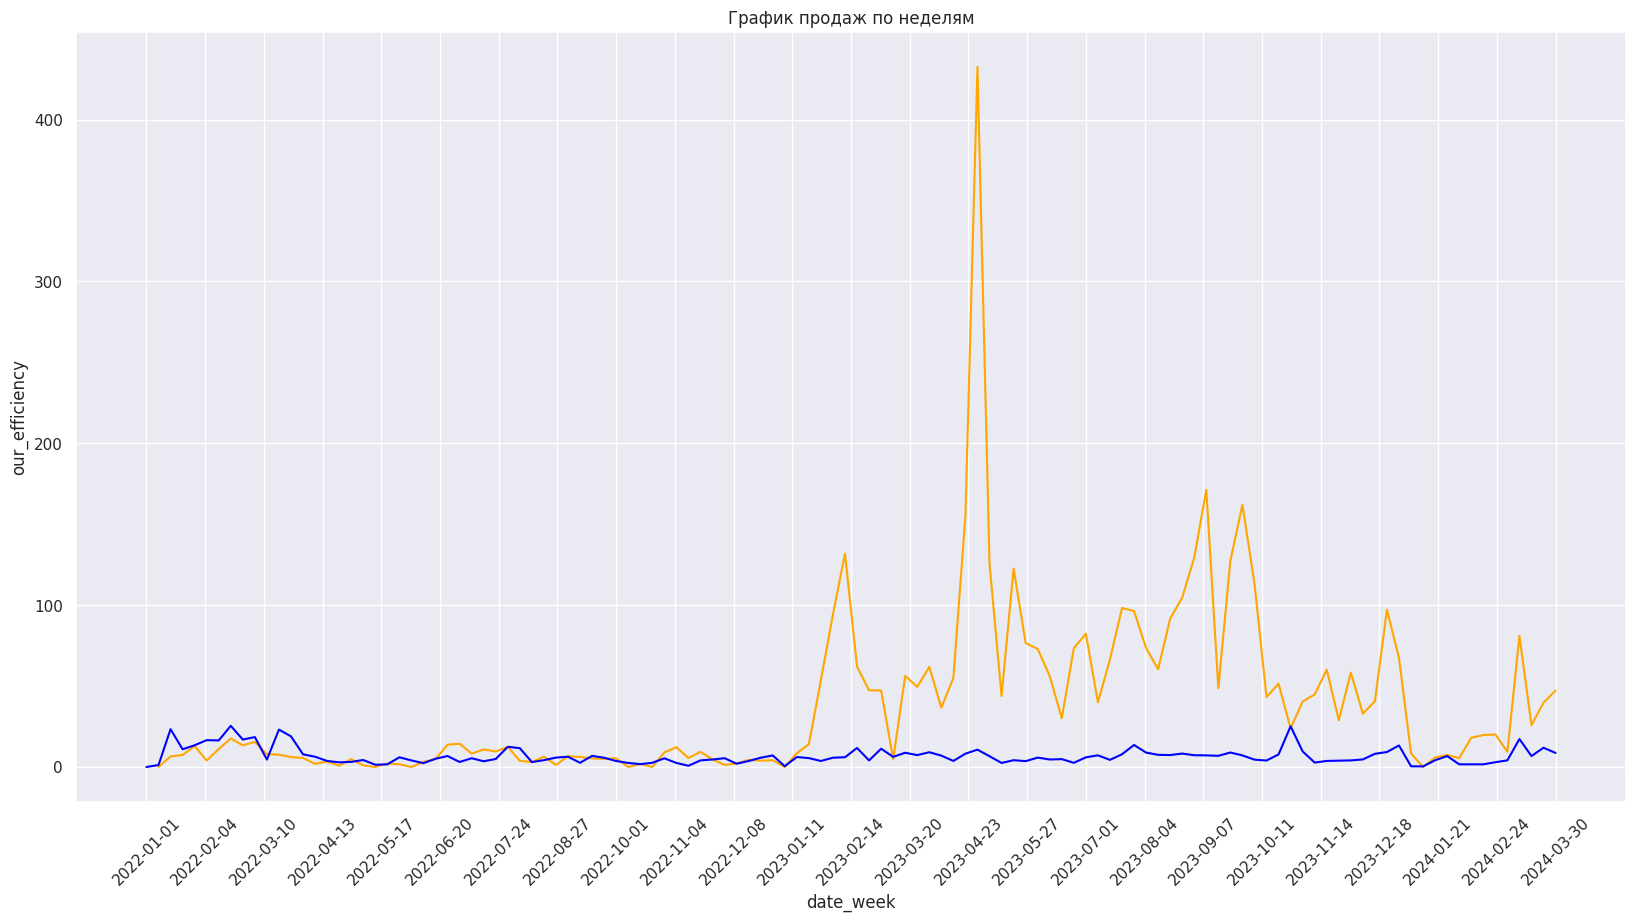

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize = (20,10))
sns.lineplot(df_parsed, x = 'date_week', y = 'our_efficiency', ax = ax, color ='#ffa600')
sns.lineplot(df_parsed, x = 'date_week', y = 'compt_efficiency', ax = ax, color ='blue')
xmin, xmax = ax.get_xlim()

dates = np.linspace(df_parsed["date_week"].min().value, df_parsed["date_week"].max().value, 25)
dates = pd.to_datetime(dates)

ax.set_xticks(dates)
_ = ax.set_xticklabels([d.strftime("%Y-%m-%d") for d in dates], rotation=45)

ax.set_title("График продаж по неделям")

# in 2023 patterns changed - what happened? (появились новые каналы)

Ранее упомянутые подозрения о качественном сдвиге в 2023 становятся еще более обоснованными. Мы видим, что именно в это время эффективность медиа становится сильно выше чем в среднем у конкурентов

Посчитаем метрику Cost per click для каждого медиа канала

In [412]:
df = pd.DataFrame()

for feature in channels:
   df[feature + ' CPC'] = df_parsed[feature]/df_parsed[feature + '_IMP']

df['SALES_mln'] = df_parsed['SALES_mln']
df['SALES_log'] = df_parsed['SALES_log']
tmp = df.corr()[['SALES_mln', 'SALES_log']].sort_values(by='SALES_log', ascending = False).drop(['SALES_log', 'SALES_mln'])
tmp = tmp.reset_index()

/tmp/ipython-input-416-1406714103.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')


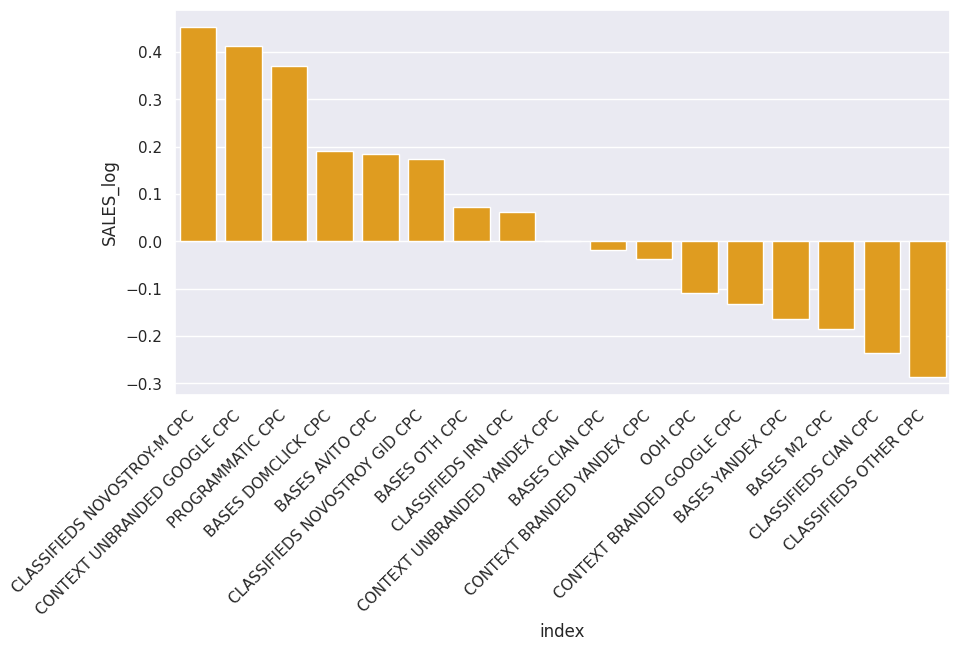

In [416]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=tmp['index'], y=tmp['SALES_log'], color ='#ffa600', ax = ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')

#### Adstock + Saturation
Зачастую вклад в рекламу имеет накопительный эффект и срабатывает через некоторое время. Поэтому для учетого данного факта мы будем использовать adstock.

Также вклад в рекламу имеет эфект насыщения - с каждым дополнительно вложенным рублем эффективность вложений падает. Для учета данного факта будем использовать функцию с похожим поведением - логарифм.

In [419]:
def apply_adstock(series, alpha=0.5):
    result = []
    carry = 0
    for x in series:
        carry = x + alpha * carry
        result.append(carry)
    return pd.Series(result, index=series.index)


temp = pd.DataFrame()

for col in channels:
  temp[col + '_adstock_saturation'] = np.log1p(apply_adstock(df_parsed[col]))
  temp[col + '_IMP_adstock_saturation'] = np.log1p(apply_adstock(df_parsed[col + '_IMP']))

temp['SALES_mln'] = df_parsed['SALES_mln']
temp['SALES_log'] = df_parsed['SALES_log']

temp = temp.corr()[['SALES_mln', 'SALES_log']].sort_values(by='SALES_log', ascending = False).drop(['SALES_log', 'SALES_mln']).reset_index()

budgets = temp[temp['index'].apply(lambda x: 'IMP' not in x)]

/tmp/ipython-input-420-327351593.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')


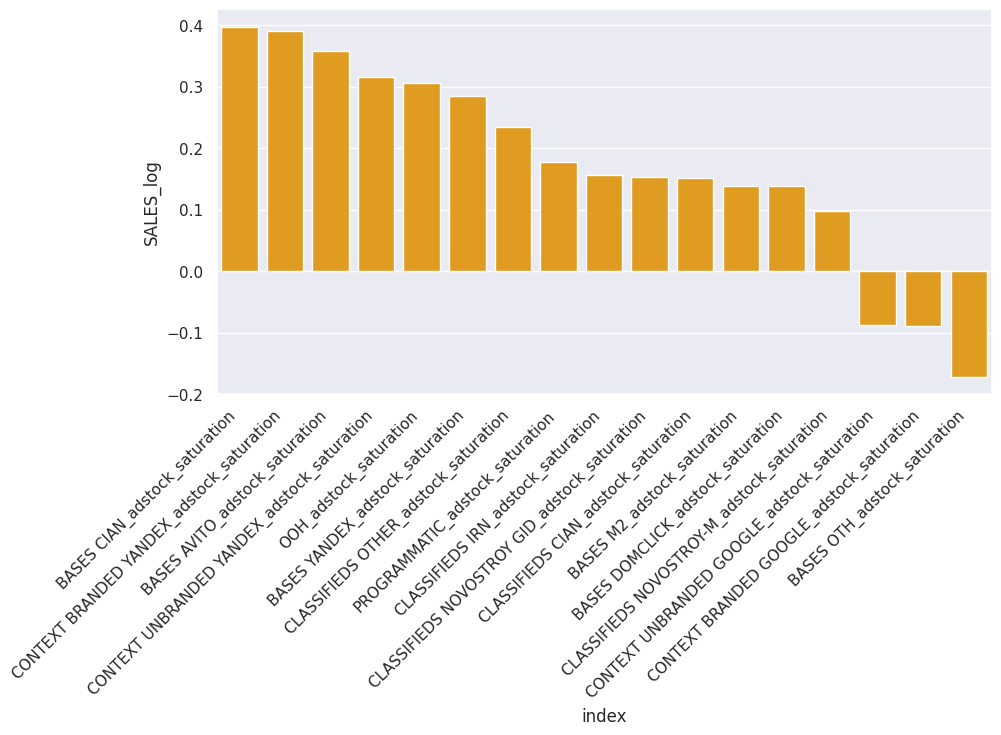

In [420]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=budgets['index'], y=budgets['SALES_log'], color ='#ffa600', ax = ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')

## Анализ
- Исследовать начало 2023 года
- Исследовать влияние ключевой ставки и связанных с ней признаков
- Влияние курса валют

#### Anomalies of 2023

In [424]:
channels

['PROGRAMMATIC',
 'OOH',
 'CONTEXT BRANDED GOOGLE',
 'CONTEXT BRANDED YANDEX',
 'CONTEXT UNBRANDED GOOGLE',
 'CONTEXT UNBRANDED YANDEX',
 'BASES AVITO',
 'BASES CIAN',
 'BASES YANDEX',
 'BASES OTH',
 'BASES M2',
 'BASES DOMCLICK',
 'CLASSIFIEDS CIAN',
 'CLASSIFIEDS IRN',
 'CLASSIFIEDS NOVOSTROY GID',
 'CLASSIFIEDS NOVOSTROY-M',
 'CLASSIFIEDS OTHER']

In [ ]:
temp = df_parsed[['date_week', 'SALES_mln', 'SALES_log', 'OTHER MEDIA', *channels]]
before = temp[temp['date_week'] < '2023-01-07']
after = temp[(temp['date_week'] >= '2023-01-01') & (temp['date_week'] < '2024-01-01')]

In [ ]:
(before[[*channels, 'OTHER MEDIA']].sum(axis = 1)/1e6).mean()

np.float64(30.44340381698113)

In [ ]:
(after[[*channels, 'OTHER MEDIA']].sum(axis = 1)/1e6).mean()

np.float64(2.937974738530639)

Видим огромное уменьшение расходов на маркетинг. При этом из графика ранее мы видели, что эффективность в рассчете на рубль выросла. Может упали абсолютные значения? Сейчас проверим

In [ ]:
before['SALES_mln'].mean(), after['SALES_mln'].mean()

(np.float64(179.6521672038604), np.float64(212.4274690804846))

In [ ]:
before['SALES_mln_rolling'] = before['SALES_mln'].rolling(window=5).mean()
after['SALES_mln_rolling'] = after['SALES_mln'].rolling(window=5).mean()

/tmp/ipython-input-122-2377627880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before['SALES_mln_rolling'] = before['SALES_mln'].rolling(window=5).mean()
/tmp/ipython-input-122-2377627880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after['SALES_mln_rolling'] = after['SALES_mln'].rolling(window=5).mean()


In [ ]:
before['month'] = before['date_week'].dt.month
after['month'] = after['date_week'].dt.month

/tmp/ipython-input-123-22293843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  before['month'] = before['date_week'].dt.month
/tmp/ipython-input-123-22293843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after['month'] = after['date_week'].dt.month


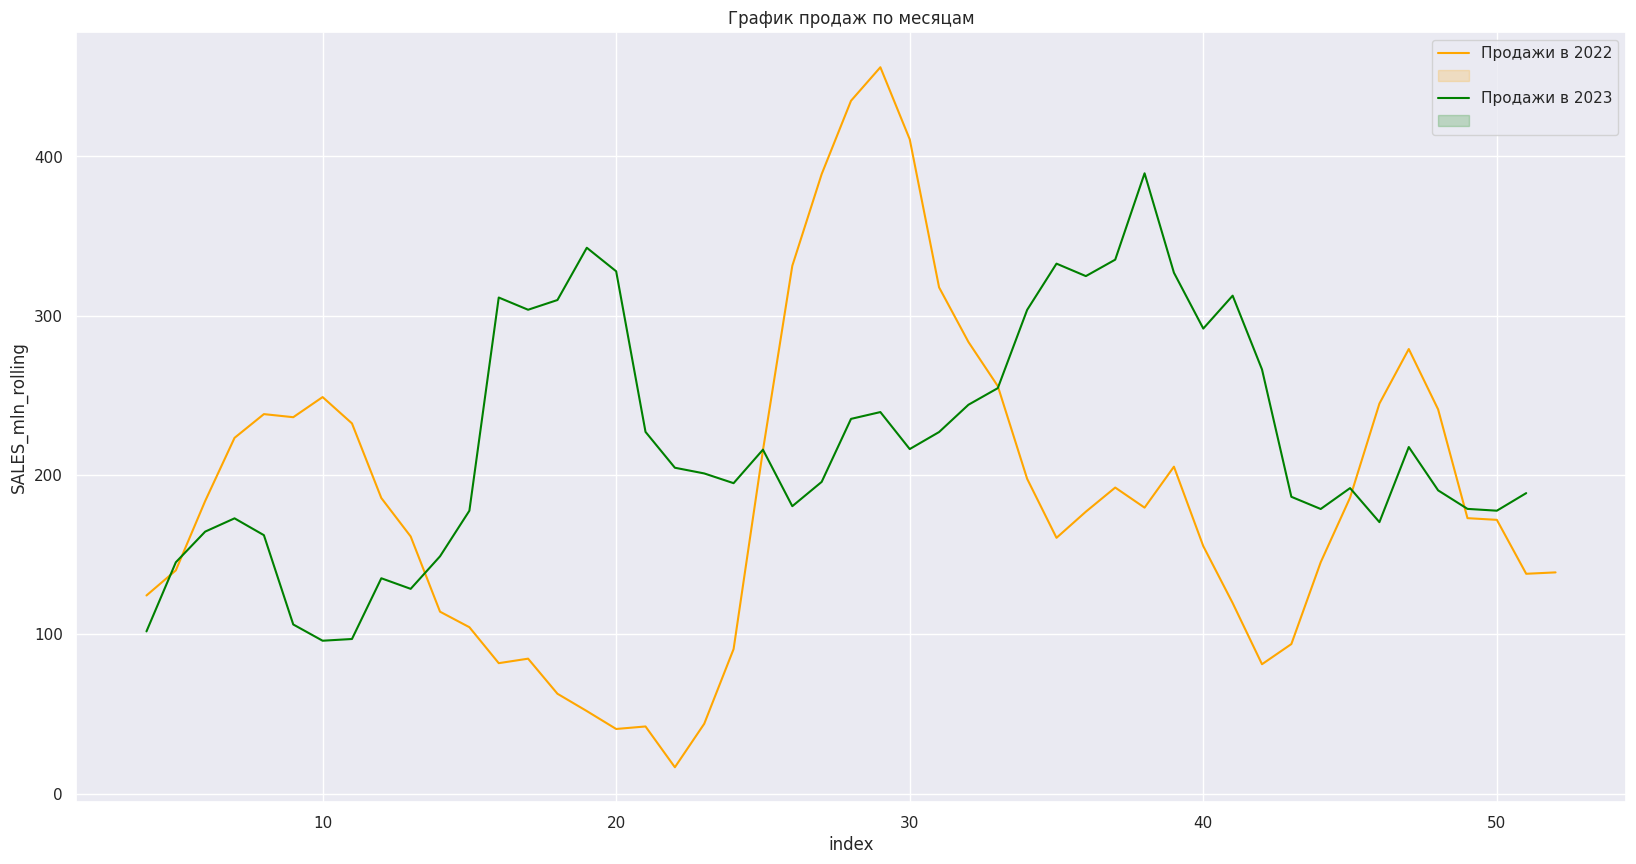

In [423]:
fig, ax = plt.subplots(figsize = (20,10))
sns.lineplot(before.reset_index(),
             x = 'index',
             y = 'SALES_mln_rolling', ax = ax, color ='#ffa600')

tmp = after.reset_index()
tmp['index'] = tmp['index'] - 53

sns.lineplot(tmp,
             x = 'index',
             y = 'SALES_mln_rolling', ax = ax, color ='green')

# xmin, xmax = ax.get_xlim()

# dates = np.linspace(df_parsed["date_week"].min().value, df_parsed["date_week"].max().value, 25)
# dates = pd.to_datetime(dates)

# ax.set_xticks(dates)
# _ = ax.set_xticklabels([d.strftime("%Y-%m-%d") for d in dates], rotation=45)

ax.set_title("График продаж по месяцам")
ax.legend(['Продажи в 2022', '', 'Продажи в 2023', ''])

Средние значения выросли. А на графике видно, что значения продаж стали более стабильными - нет провалов. Мы видим, что с одной стороны, сокращение медиа инвестиций не ухудшило значения продаж. Вместе с этим в 2023 появилось несколько активных каналов рекламы. Еще два канала были отключены - вспомним их влияние на целевую переменную, полученные ранее

In [ ]:
after['SALES_log'] = np.log1p(after['SALES_log'])

/tmp/ipython-input-158-1810323865.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after['SALES_log'] = np.log1p(after['SALES_log'])


In [425]:
sus_features = [
    'CLASSIFIEDS CIAN',
    'CLASSIFIEDS IRN',
    'CLASSIFIEDS NOVOSTROY GID',
    'CLASSIFIEDS NOVOSTROY-M',
    'CLASSIFIEDS OTHER',
]


tmp = after[[*channels, 'SALES_mln', 'SALES_log']].corr()[['SALES_mln', 'SALES_log']].sort_values(by='SALES_log', ascending=False).drop(['SALES_log', 'SALES_mln']).reset_index()
tmp

,index,SALES_mln,SALES_log
0,CONTEXT BRANDED YANDEX,0.286776,0.345741
1,CLASSIFIEDS NOVOSTROY GID,0.253590,0.322825
2,OOH,0.232378,0.310963
3,BASES AVITO,0.349722,0.263266
4,PROGRAMMATIC,0.046388,0.213753
5,CLASSIFIEDS CIAN,0.207170,0.187827
6,BASES DOMCLICK,0.254181,0.163204
7,BASES M2,0.374097,0.126809
8,BASES CIAN,0.229202,0.126411
9,CLASSIFIEDS OTHER,0.070882,0.100411


/tmp/ipython-input-426-1406714103.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')


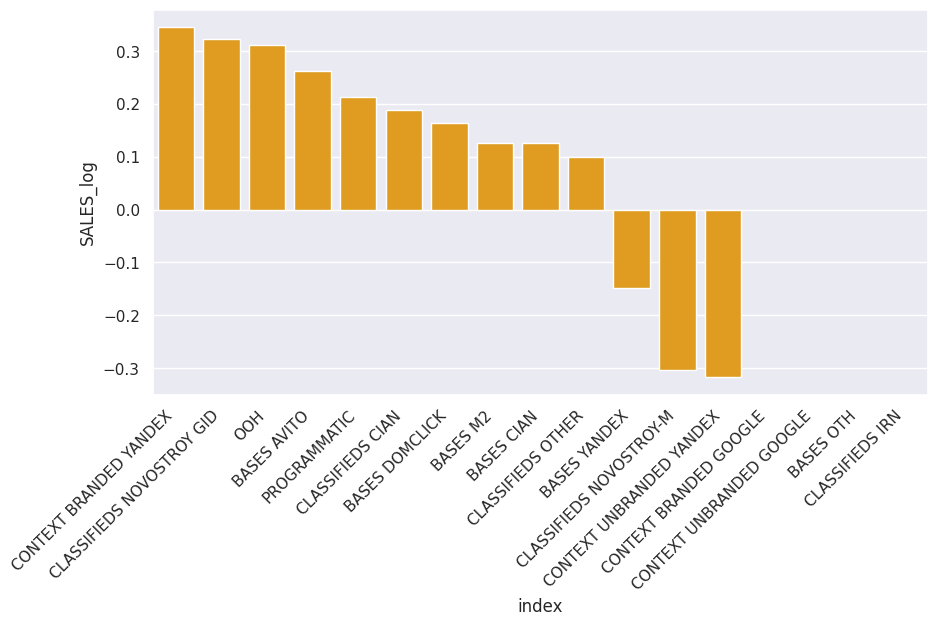

In [426]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=tmp['index'], y=tmp['SALES_log'], color ='#ffa600', ax = ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')

Замечаем, что некоторые из новых каналов показывают серьезное влияние на целевую переменную - на равне с одними из лучших каналов в 2022 году. Вместе с этим, некоторые из новых каналов показывают отрицательную корреляцию с продажами - к примеру Новострой-М. Логично будет предположить, что вложения в этот канал стоит уменьшить

In [427]:
tmp = before[[*channels, 'SALES_mln', 'SALES_log']].corr()[['SALES_mln', 'SALES_log']].sort_values(by='SALES_log', ascending=False).drop(['SALES_log', 'SALES_mln']).reset_index()
tmp

,index,SALES_mln,SALES_log
0,CONTEXT BRANDED YANDEX,0.621971,0.440567
1,BASES CIAN,0.461243,0.338092
2,BASES YANDEX,0.493239,0.272096
3,OOH,0.248601,0.208730
4,BASES AVITO,0.074309,0.148483
5,BASES M2,0.402054,0.148426
6,CONTEXT UNBRANDED YANDEX,0.121607,0.140449
7,BASES OTH,0.177139,0.110132
8,CONTEXT BRANDED GOOGLE,0.044656,0.071817
9,BASES DOMCLICK,0.003068,0.058862


/tmp/ipython-input-428-1406714103.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')


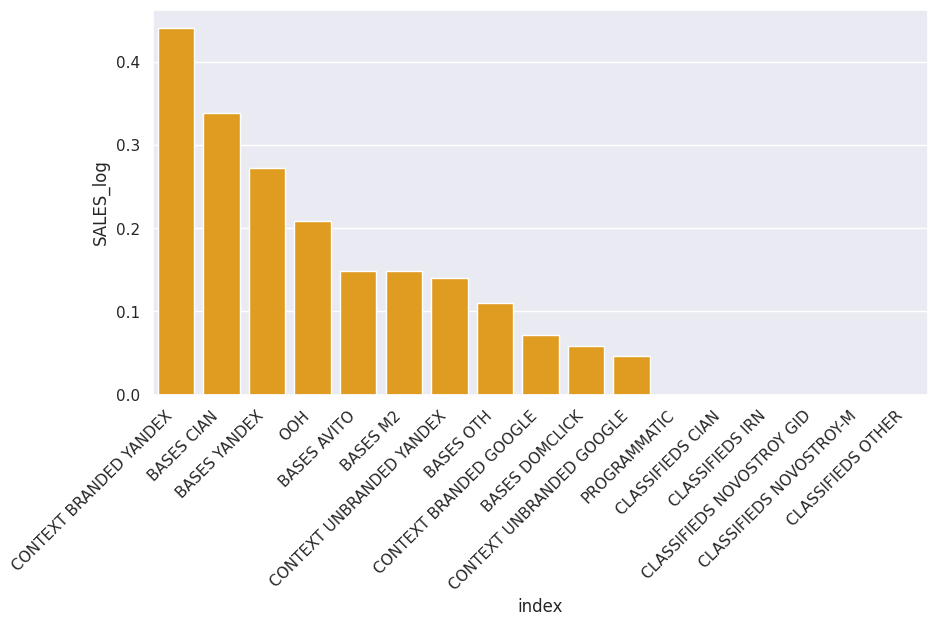

In [428]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x=tmp['index'], y=tmp['SALES_log'], color ='#ffa600', ax = ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, ha='right')

In [ ]:
non_comm_features = [
    'D15', 'D20', 'D25', 'D30',
    'PRICE',
    'MKT', 'COMPETITIVE SPEND','AGENTS', 'key_rate', 'usd', 'cny'
]

mort_features = [
      'Количество предоставленных кредитов за месяц, единиц',
       'Объем предоставленных кредитов за месяц, млн руб.',
       'Задолженность по предоставленным кредитам, млн руб., в том числе',
       '     просроченная задолженность по предоставленным кредитам, млн руб.',
       'Задолженность по приобретенным кредитными организациями правам требования по ипотечным жилищным кредитам, млн руб.',
       'Задолженность  по предоставленным кредитам с учетом  приобретенных кредитными организациями прав требования, млн руб.',
       'Средневзвешенный срок кредитования по кредитам, выданным в течение месяца, месяцев',
       'Средневзвешенная ставка по кредитам, выданным в течение месяца, %',
]

# for feature in mort_features:
#   df_parsed[feature] = df_parsed[feature].apply(lambda x: float(x.replace(',', '.')))



In [ ]:
df_parsed[mort_features].mean()

,0
"Количество предоставленных кредитов за месяц, единиц",139131.220339
"Объем предоставленных кредитов за месяц, млн руб.",515774.720339
"Задолженность по предоставленным кредитам, млн руб., в том числе",14480114.90678
"просроченная задолженность по предоставленным кредитам, млн руб.",57326.711864
"Задолженность по приобретенным кредитными организациями правам требования по ипотечным жилищным кредитам, млн руб.",214970.974576
"Задолженность по предоставленным кредитам с учетом приобретенных кредитными организациями прав требования, млн руб.",14695085.855932
"Средневзвешенный срок кредитования по кредитам, выданным в течение месяца, месяцев",282.683898
"Средневзвешенная ставка по кредитам, выданным в течение месяца, %",7.746525


In [429]:
before_all = df_parsed[df_parsed['date_week'] < '2023-01-07']
after_all = df_parsed[(df_parsed['date_week'] >= '2023-01-01') & (df_parsed['date_week'] < '2024-01-01')]
before_all.columns

Index(['#_week', 'date_week', 'SALES', 'D15', 'D20', 'D25', 'D30', 'PRICE',
       'MKT', 'COMPETITIVE SPEND', 'AGENTS', 'OTHER MEDIA', 'PROGRAMMATIC',
       'PROGRAMMATIC_IMP', 'OOH', 'OOH_IMP', 'CONTEXT BRANDED GOOGLE',
       'CONTEXT BRANDED YANDEX', 'CONTEXT UNBRANDED GOOGLE',
       'CONTEXT UNBRANDED YANDEX', 'CONTEXT BRANDED GOOGLE_IMP',
       'CONTEXT BRANDED YANDEX_IMP', 'CONTEXT UNBRANDED GOOGLE_IMP',
       'CONTEXT UNBRANDED YANDEX_IMP', 'BASES AVITO', 'BASES CIAN',
       'BASES YANDEX', 'BASES OTH', 'BASES M2', 'BASES DOMCLICK',
       'BASES AVITO_IMP', 'BASES CIAN_IMP', 'BASES YANDEX_IMP',
       'BASES OTH_IMP', 'BASES M2_IMP', 'BASES DOMCLICK_IMP',
       'CLASSIFIEDS CIAN', 'CLASSIFIEDS IRN', 'CLASSIFIEDS NOVOSTROY GID',
       'CLASSIFIEDS NOVOSTROY-M', 'CLASSIFIEDS OTHER', 'CLASSIFIEDS CIAN_IMP',
       'CLASSIFIEDS IRN_IMP', 'CLASSIFIEDS NOVOSTROY GID_IMP',
       'CLASSIFIEDS NOVOSTROY-M_IMP', 'CLASSIFIEDS OTHER_IMP', 'SALES_mln',
       'SALES_mln_rolling', '

In [430]:
tmp = before_all[non_comm_features].agg('mean').reset_index()
tmp

,index,0
0,D15,0.000000e+00
1,D20,4.150943e-01
2,D25,0.000000e+00
3,D30,1.509434e-01
4,PRICE,3.248581e+05
5,MKT,1.064540e+09
6,COMPETITIVE SPEND,1.619484e+08
7,AGENTS,1.459707e+06
8,key_rate,1.052830e+01
9,usd,6.839206e+01


In [ ]:
after_all[non_comm_features].agg('mean')

,0
D15,0.000000e+00
D20,0.000000e+00
D25,3.461538e-01
D30,9.615385e-02
PRICE,3.783268e+05
MKT,1.612465e+09
COMPETITIVE SPEND,2.417261e+08
AGENTS,1.191236e+06
key_rate,9.961538e+00
usd,8.540565e+01


#### Влияние курса валют

/tmp/ipython-input-282-2217844130.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['SALES_hun_mln'] = tmp['SALES_mln']/10
/tmp/ipython-input-282-2217844130.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['SALES_hun_mln_rolled'] = tmp['SALES_hun_mln'].rolling(5).mean()


<Axes: >

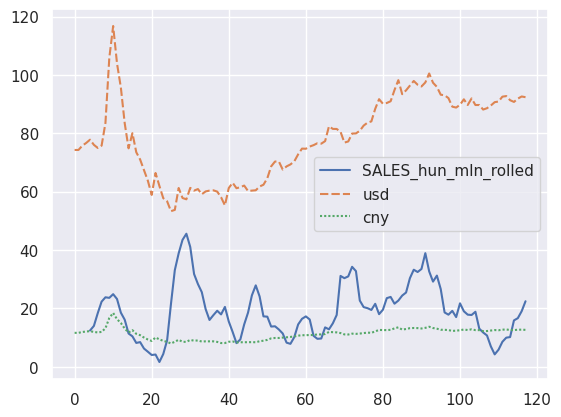

In [ ]:
tmp = df_parsed[['date_week', 'SALES_mln', 'usd', 'cny']]
tmp['SALES_hun_mln'] = tmp['SALES_mln']/10
tmp['SALES_hun_mln_rolled'] = tmp['SALES_hun_mln'].rolling(5).mean()

sns.lineplot(tmp[['SALES_hun_mln_rolled', 'usd', 'cny']])

#### Влияние фич, связанных с ипотекой

In [ ]:
df_parsed[[*mort_features, 'SALES_mln']].corr()['SALES_mln']

,SALES_mln
"Количество предоставленных кредитов за месяц, единиц",-0.011350
"Объем предоставленных кредитов за месяц, млн руб.",0.010954
"Задолженность по предоставленным кредитам, млн руб., в том числе",0.031318
"просроченная задолженность по предоставленным кредитам, млн руб.",-0.085084
"Задолженность по приобретенным кредитными организациями правам требования по ипотечным жилищным кредитам, млн руб.",-0.090498
"Задолженность по предоставленным кредитам с учетом приобретенных кредитными организациями прав требования, млн руб.",0.030737
"Средневзвешенный срок кредитования по кредитам, выданным в течение месяца, месяцев",0.048376
"Средневзвешенная ставка по кредитам, выданным в течение месяца, %",-0.010510
SALES_mln,1.000000


In [ ]:
tmp = df_parsed[[*mort_features, 'SALES_mln']]
tmp

,"Количество предоставленных кредитов за месяц, единиц","Объем предоставленных кредитов за месяц, млн руб.","Задолженность по предоставленным кредитам, млн руб., в том числе","просроченная задолженность по предоставленным кредитам, млн руб.","Задолженность по приобретенным кредитными организациями правам требования по ипотечным жилищным кредитам, млн руб.","Задолженность по предоставленным кредитам с учетом приобретенных кредитными организациями прав требования, млн руб.","Средневзвешенный срок кредитования по кредитам, выданным в течение месяца, месяцев","Средневзвешенная ставка по кредитам, выданным в течение месяца, %",SALES_mln
0,192410,641337,11752902,59471,250806,12003708,257.1,7.81,0.000000
1,192410,641337,11752902,59471,250806,12003708,257.1,7.81,0.000000
2,192410,641337,11752902,59471,250806,12003708,257.1,7.81,149.983065
3,192410,641337,11752902,59471,250806,12003708,257.1,7.81,172.073234
4,192410,641337,11752902,59471,250806,12003708,257.1,7.81,300.130820
...,...,...,...,...,...,...,...,...,...
113,95561,332814,18219693,61235,185229,18404922,292.1,9.28,77.572144
114,95561,332814,18219693,61235,185229,18404922,292.1,9.28,328.111559
115,95561,332814,18219693,61235,185229,18404922,292.1,9.28,168.802625
116,95561,332814,18219693,61235,185229,18404922,292.1,9.28,254.433162


/tmp/ipython-input-293-1971603649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['SALES_hun_mln'] = tmp['SALES_mln']/10
/tmp/ipython-input-293-1971603649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['SALES_hun_mln_rolled'] = tmp['SALES_hun_mln'].rolling(5).mean()
/tmp/ipython-input-293-1971603649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

<Axes: >

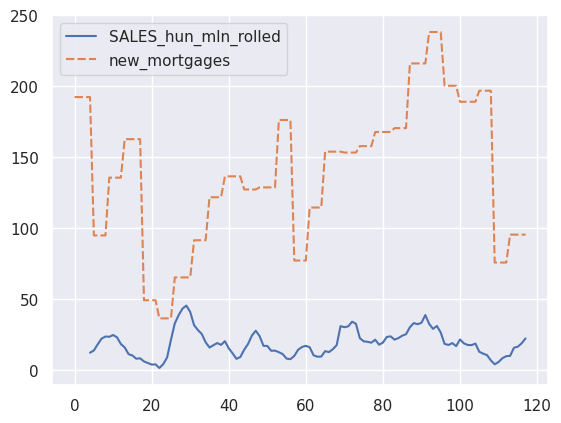

In [ ]:
tmp['SALES_hun_mln'] = tmp['SALES_mln']/10
tmp['SALES_hun_mln_rolled'] = tmp['SALES_hun_mln'].rolling(5).mean()
tmp['new_mortgages'] = tmp['Количество предоставленных кредитов за месяц, единиц']/1000

sns.lineplot(tmp[['SALES_hun_mln_rolled', 'new_mortgages']])

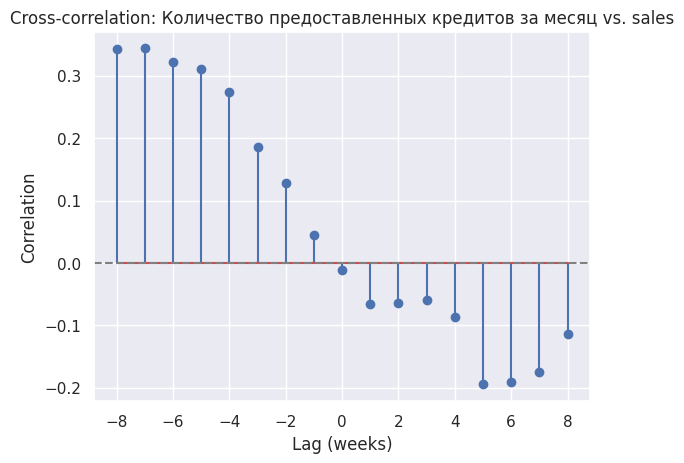

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def cross_corr(series_x, series_y, max_lag=10):
    lags = range(-max_lag, max_lag + 1)
    corrs = [series_x.corr(series_y.shift(lag)) for lag in lags]
    return lags, corrs

lags, corrs = cross_corr(tmp['SALES_hun_mln'], tmp['new_mortgages'], max_lag=8)

plt.stem(lags, corrs)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Lag (weeks)')
plt.ylabel('Correlation')
plt.title('Cross-correlation: Количество предоставленных кредитов за месяц vs. sales')
plt.show()

/tmp/ipython-input-318-1422714860.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['SALES_ten_mln'] = tmp['SALES_mln']/10
/tmp/ipython-input-318-1422714860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['SALES_ten_mln_rolled'] = tmp['SALES_hun_mln'].rolling(5).mean()
/tmp/ipython-input-318-1422714860.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

<Axes: >

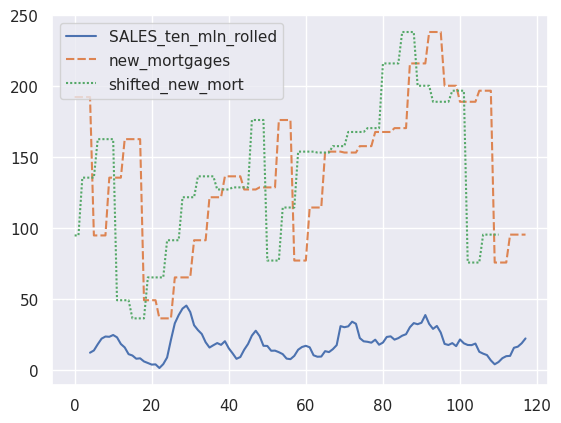

In [ ]:
tmp['SALES_ten_mln'] = tmp['SALES_mln']/10
tmp['SALES_ten_mln_rolled'] = tmp['SALES_hun_mln'].rolling(5).mean()
tmp['new_mortgages'] = tmp['Количество предоставленных кредитов за месяц, единиц']/1000
tmp['shifted_new_mort'] = tmp['new_mortgages'].shift(-7)

sns.lineplot(tmp[['SALES_hun_mln_rolled', 'new_mortgages', 'shifted_new_mort']])

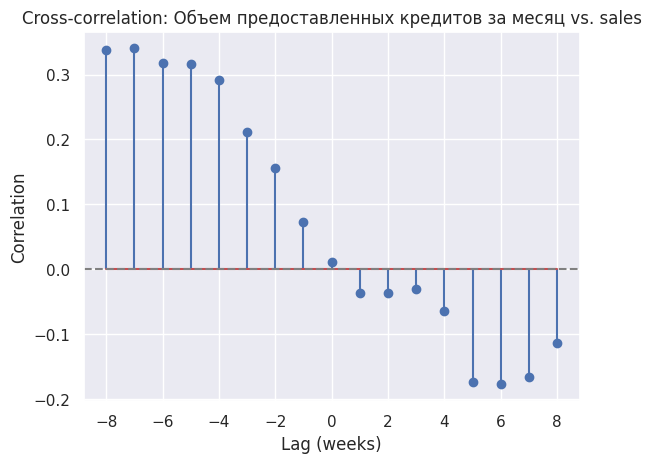

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def cross_corr(series_x, series_y, max_lag=10):
    lags = range(-max_lag, max_lag + 1)
    corrs = [series_x.corr(series_y.shift(lag)) for lag in lags]
    return lags, corrs

lags, corrs = cross_corr(tmp['SALES_hun_mln'], tmp['Объем предоставленных кредитов за месяц, млн руб.'], max_lag=8)

plt.stem(lags, corrs)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Lag (weeks)')
plt.ylabel('Correlation')
plt.title('Cross-correlation: Объем предоставленных кредитов за месяц vs. sales')
plt.show()

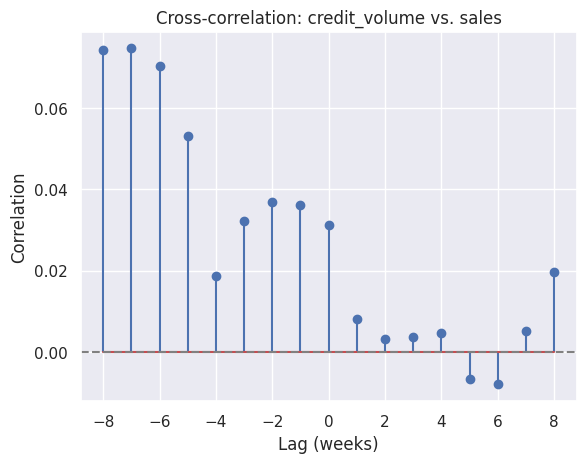

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def cross_corr(series_x, series_y, max_lag=10):
    lags = range(-max_lag, max_lag + 1)
    corrs = [series_x.corr(series_y.shift(lag)) for lag in lags]
    return lags, corrs

lags, corrs = cross_corr(tmp['SALES_hun_mln'], tmp['Задолженность по предоставленным кредитам, млн руб., в том числе'], max_lag=8)

plt.stem(lags, corrs)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Lag (weeks)')
plt.ylabel('Correlation')
plt.title('Cross-correlation: credit_volume vs. sales')
plt.show()

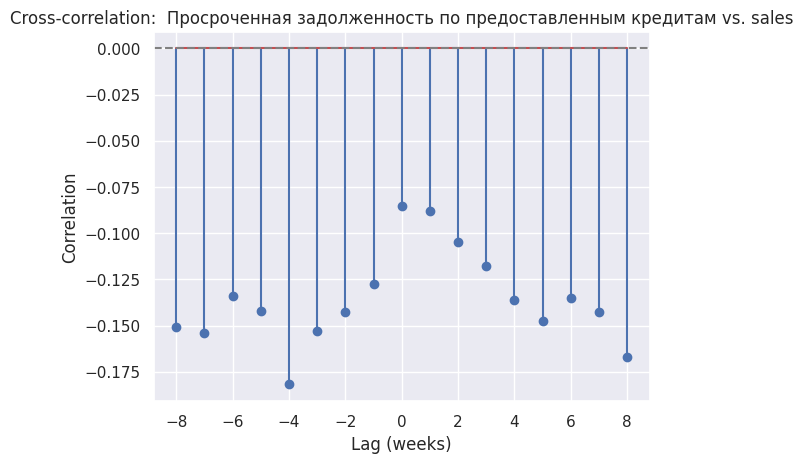

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def cross_corr(series_x, series_y, max_lag=10):
    lags = range(-max_lag, max_lag + 1)
    corrs = [series_x.corr(series_y.shift(lag)) for lag in lags]
    return lags, corrs

lags, corrs = cross_corr(tmp['SALES_hun_mln'], tmp['     просроченная задолженность по предоставленным кредитам, млн руб.'], max_lag=8)

plt.stem(lags, corrs)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Lag (weeks)')
plt.ylabel('Correlation')
plt.title('Cross-correlation:  Просроченная задолженность по предоставленным кредитам vs. sales')
plt.show()

/tmp/ipython-input-322-4462980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['overdraft'] = tmp['     просроченная задолженность по предоставленным кредитам, млн руб.']/1000
/tmp/ipython-input-322-4462980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['shifted_overdraft'] = tmp['overdraft'].shift(-4)


<Axes: >

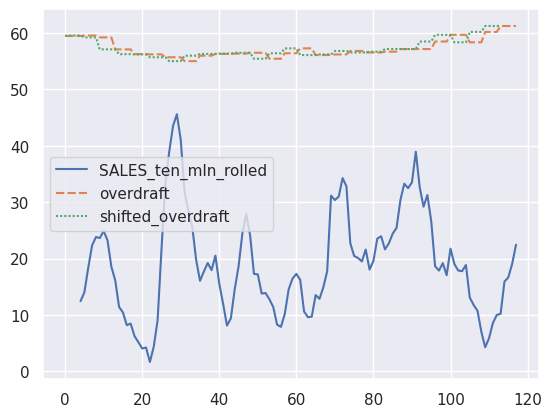

In [ ]:
tmp['overdraft'] = tmp['     просроченная задолженность по предоставленным кредитам, млн руб.']/1000
tmp['shifted_overdraft'] = tmp['overdraft'].shift(-4)

sns.lineplot(tmp[['SALES_ten_mln_rolled', 'overdraft', 'shifted_overdraft']])

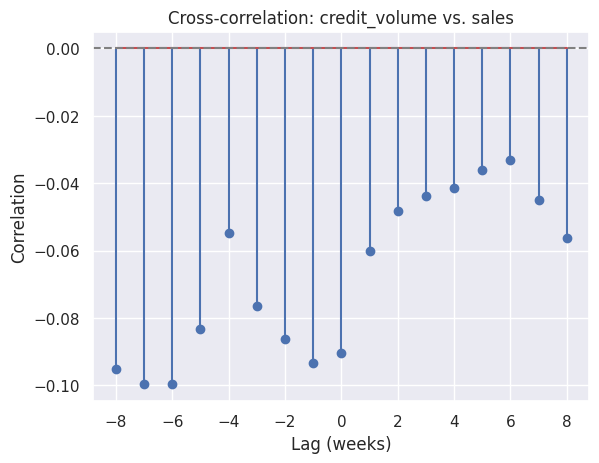

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def cross_corr(series_x, series_y, max_lag=10):
    lags = range(-max_lag, max_lag + 1)
    corrs = [series_x.corr(series_y.shift(lag)) for lag in lags]
    return lags, corrs

lags, corrs = cross_corr(tmp['SALES_hun_mln'], tmp['Задолженность по приобретенным кредитными организациями правам требования по ипотечным жилищным кредитам, млн руб.'], max_lag=8)

plt.stem(lags, corrs)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Lag (weeks)')
plt.ylabel('Correlation')
plt.title('Cross-correlation: credit_volume vs. sales')
plt.show()

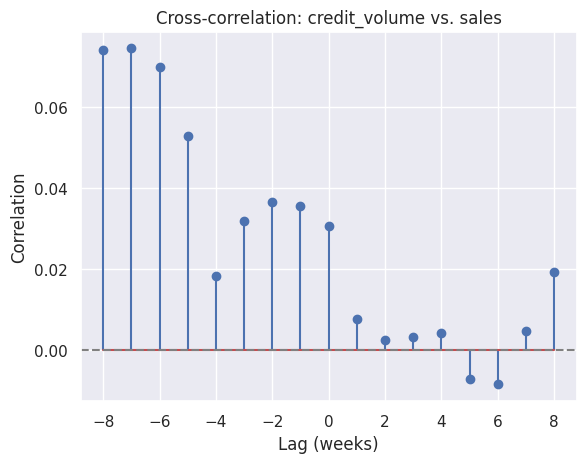

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def cross_corr(series_x, series_y, max_lag=10):
    lags = range(-max_lag, max_lag + 1)
    corrs = [series_x.corr(series_y.shift(lag)) for lag in lags]
    return lags, corrs

lags, corrs = cross_corr(tmp['SALES_hun_mln'], tmp['Задолженность  по предоставленным кредитам с учетом  приобретенных кредитными организациями прав требования, млн руб.'], max_lag=8)

plt.stem(lags, corrs)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Lag (weeks)')
plt.ylabel('Correlation')
plt.title('Cross-correlation: credit_volume vs. sales')
plt.show()

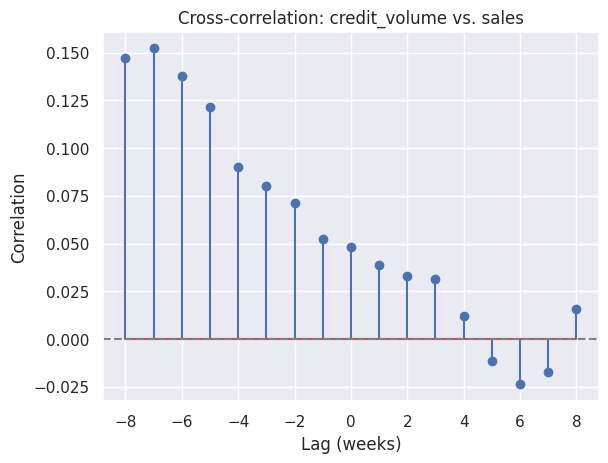

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def cross_corr(series_x, series_y, max_lag=10):
    lags = range(-max_lag, max_lag + 1)
    corrs = [series_x.corr(series_y.shift(lag)) for lag in lags]
    return lags, corrs

lags, corrs = cross_corr(tmp['SALES_hun_mln'], tmp['Средневзвешенный срок кредитования по кредитам, выданным в течение месяца, месяцев'], max_lag=8)

plt.stem(lags, corrs)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Lag (weeks)')
plt.ylabel('Correlation')
plt.title('Cross-correlation: credit_volume vs. sales')
plt.show()

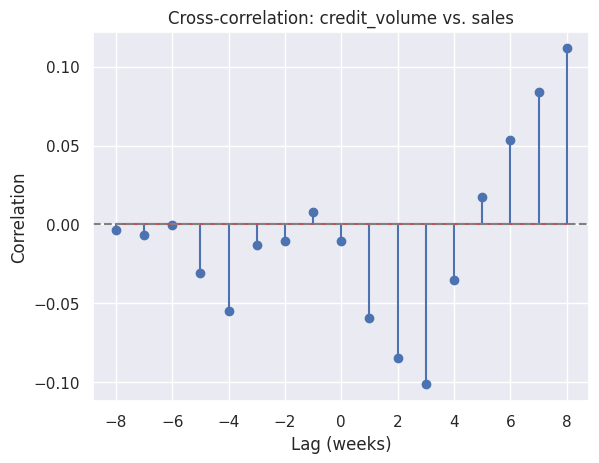

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def cross_corr(series_x, series_y, max_lag=10):
    lags = range(-max_lag, max_lag + 1)
    corrs = [series_x.corr(series_y.shift(lag)) for lag in lags]
    return lags, corrs

lags, corrs = cross_corr(tmp['SALES_hun_mln'], tmp['Средневзвешенная ставка по кредитам, выданным в течение месяца, %'], max_lag=8)

plt.stem(lags, corrs)
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('Lag (weeks)')
plt.ylabel('Correlation')
plt.title('Cross-correlation: credit_volume vs. sales')
plt.show()